# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
import sys
proj_root= '\\'.join(os.getcwd().split('\\')[:-1])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
proj_root

'C:\\Users\\dib_n\\OneDrive\\Documentos\\github\\mudib_house_prices'

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Utils

In [6]:
def add_labels(ax,type_='vertical',format_='{}'):
    rects = ax.patches
    tam_ = np.abs(ax.get_xlim()[0]-ax.get_xlim()[1])
    
    if type_=='vertical':
        for rect in rects:
            height = rect.get_height()
            label = format_.format(height)
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
            )
    else:
        for rect in rects:
            width = rect.get_width()
            label = format_.format(width)
            ax.text(
                rect.get_width()+0.01*tam_, rect.get_y(), label, ha="left", va="bottom"
            )

In [ ]:
def investigate_string(X):
    fig,axs=plt.subplots(figsize=(12,12))
    X.value_counts().plot(kind='barh',ax=axs)
    plt.show()
    
def investigate_nmr(X):
    fig,axs=plt.subplots(figsize=(20,12),nrows=2)
    sns.histplot(data=X,ax=axs[0])
    sns.boxplot(x=X,ax=axs[1])
    plt.show()

# Load data

In [7]:
# Train data
df = pd.read_csv(proj_root+'/dados/train.csv')
df.drop('Id',axis=1,inplace=True)
X,y = (df.drop('SalePrice',axis=1),df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=6,test_size=.3)

In [8]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
435,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal
1166,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
935,30,RL,52.0,5825,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
588,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
80,60,RL,100.0,13000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,252,0,NaN,NaN,NaN,0,6,2009,WD,Normal


# Explanatory

## Checking if there are nulls

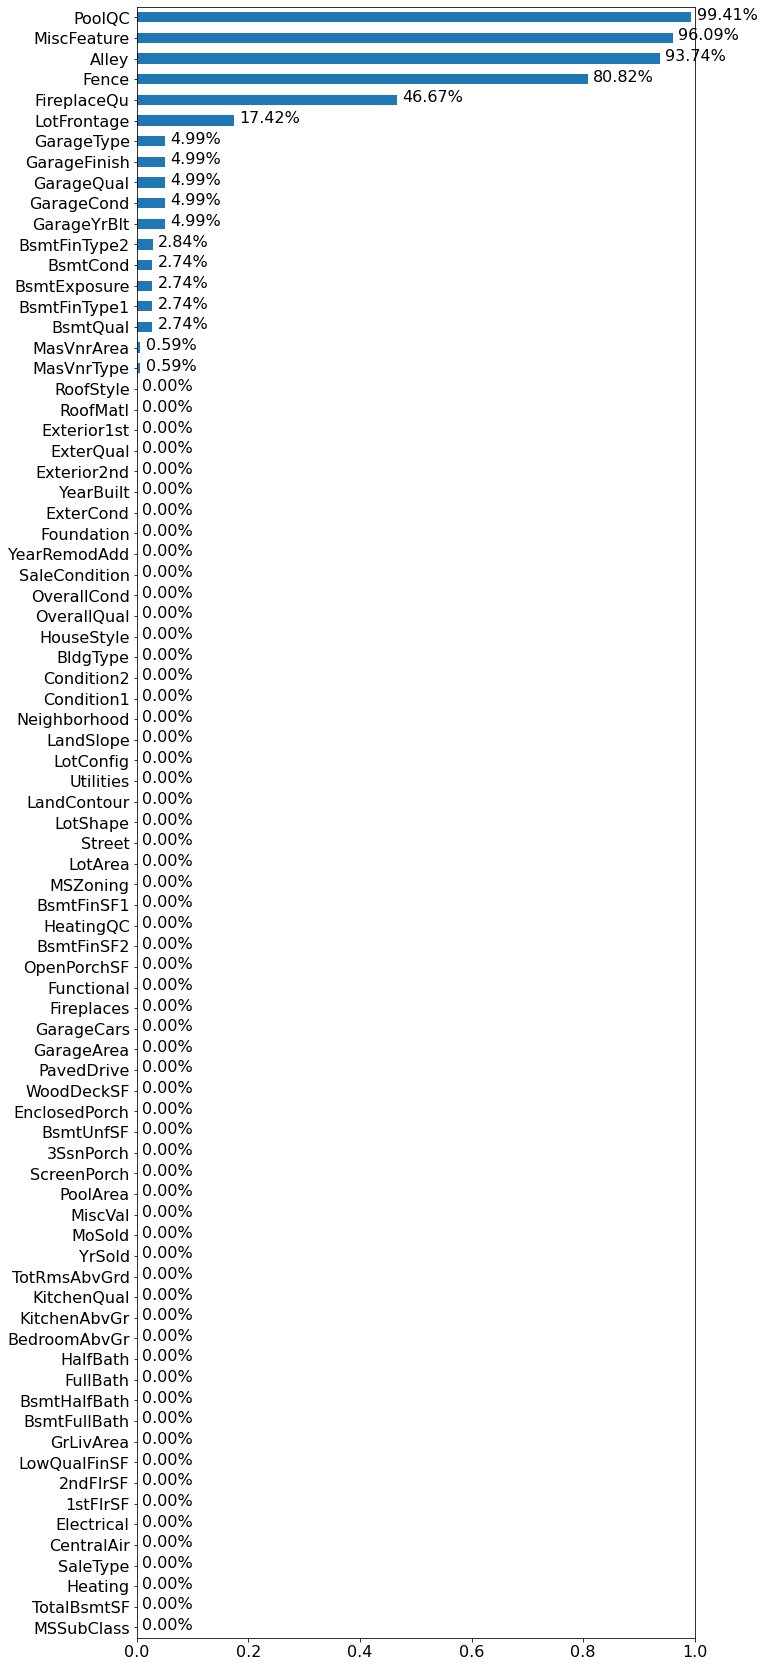

In [9]:
fig,axs=plt.subplots(figsize=(10,30))

X_train.isnull().mean().sort_values().plot(kind='barh',ax=axs)
axs.set_xlim(0,1)
add_labels(axs,type_='horizontal',format_="{:.2%}")
plt.show()

## Treating NULLs

In [11]:
X_train['PoolQC'] = X_train['PoolQC'].replace(np.nan,'no_pool')
X_train['MiscFeature'] = X_train['MiscFeature'].replace(np.nan,'no_misc')
X_train['Alley'] = X_train['Alley'].replace(np.nan,'no_alley')
X_train['Fence'] = X_train['Fence'].replace(np.nan,'no_fence')
X_train['FireplaceQu'] = X_train['FireplaceQu'].replace(np.nan,'no_fireplace')
X_train['LotFrontage'] = X_train['LotFrontage'].replace(np.nan,0)
X_train['GarageType'] = X_train['GarageType'].replace(np.nan,'no_garage')
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.nan,0)
X_train['GarageFinish'] = X_train['GarageFinish'].replace(np.nan,'no_garage')
X_train['GarageQual'] = X_train['GarageQual'].replace(np.nan,'no_garage')
X_train['GarageCond'] = X_train['GarageCond'].replace(np.nan,'no_garage')
X_train['BsmtQual'] = X_train['BsmtQual'].replace(np.nan,'no_bsmt')
X_train['BsmtCond'] = X_train['BsmtCond'].replace(np.nan,'no_bsmt')
X_train['BsmtExposure'] = X_train['BsmtExposure'].replace(np.nan,'no_bsmt')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].replace(np.nan,'no_bsmt')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].replace(np.nan,'no_bsmt')
X_train['MasVnrType'] = X_train['MasVnrType'].replace(np.nan,'None')
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.nan,0)
X_train['Electrical'] = X_train['Electrical'].replace(np.nan,'no_ele')

In [12]:
X_test['PoolQC'] = X_test['PoolQC'].replace(np.nan,'no_pool')
X_test['MiscFeature'] = X_test['MiscFeature'].replace(np.nan,'no_misc')
X_test['Alley'] = X_test['Alley'].replace(np.nan,'no_alley')
X_test['Fence'] = X_test['Fence'].replace(np.nan,'no_fence')
X_test['FireplaceQu'] = X_test['FireplaceQu'].replace(np.nan,'no_fireplace')
X_test['LotFrontage'] = X_test['LotFrontage'].replace(np.nan,0)
X_test['GarageType'] = X_test['GarageType'].replace(np.nan,'no_garage')
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].replace(np.nan,0)
X_test['GarageFinish'] = X_test['GarageFinish'].replace(np.nan,'no_garage')
X_test['GarageQual'] = X_test['GarageQual'].replace(np.nan,'no_garage')
X_test['GarageCond'] = X_test['GarageCond'].replace(np.nan,'no_garage')
X_test['BsmtQual'] = X_test['BsmtQual'].replace(np.nan,'no_bsmt')
X_test['BsmtCond'] = X_test['BsmtCond'].replace(np.nan,'no_bsmt')
X_test['BsmtExposure'] = X_test['BsmtExposure'].replace(np.nan,'no_bsmt')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].replace(np.nan,'no_bsmt')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].replace(np.nan,'no_bsmt')
X_test['MasVnrType'] = X_test['MasVnrType'].replace(np.nan,'None')
X_test['MasVnrArea'] = X_test['MasVnrArea'].replace(np.nan,0)
X_test['Electrical'] = X_test['Electrical'].replace(np.nan,'no_ele')

## Checking Data Types and Distributions

In [13]:
colunas_tratadas = {}

In [14]:
for c in sorted(X_train.columns):
    print(c)

1stFlrSF
2ndFlrSF
3SsnPorch
Alley
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


### Square Feets Units

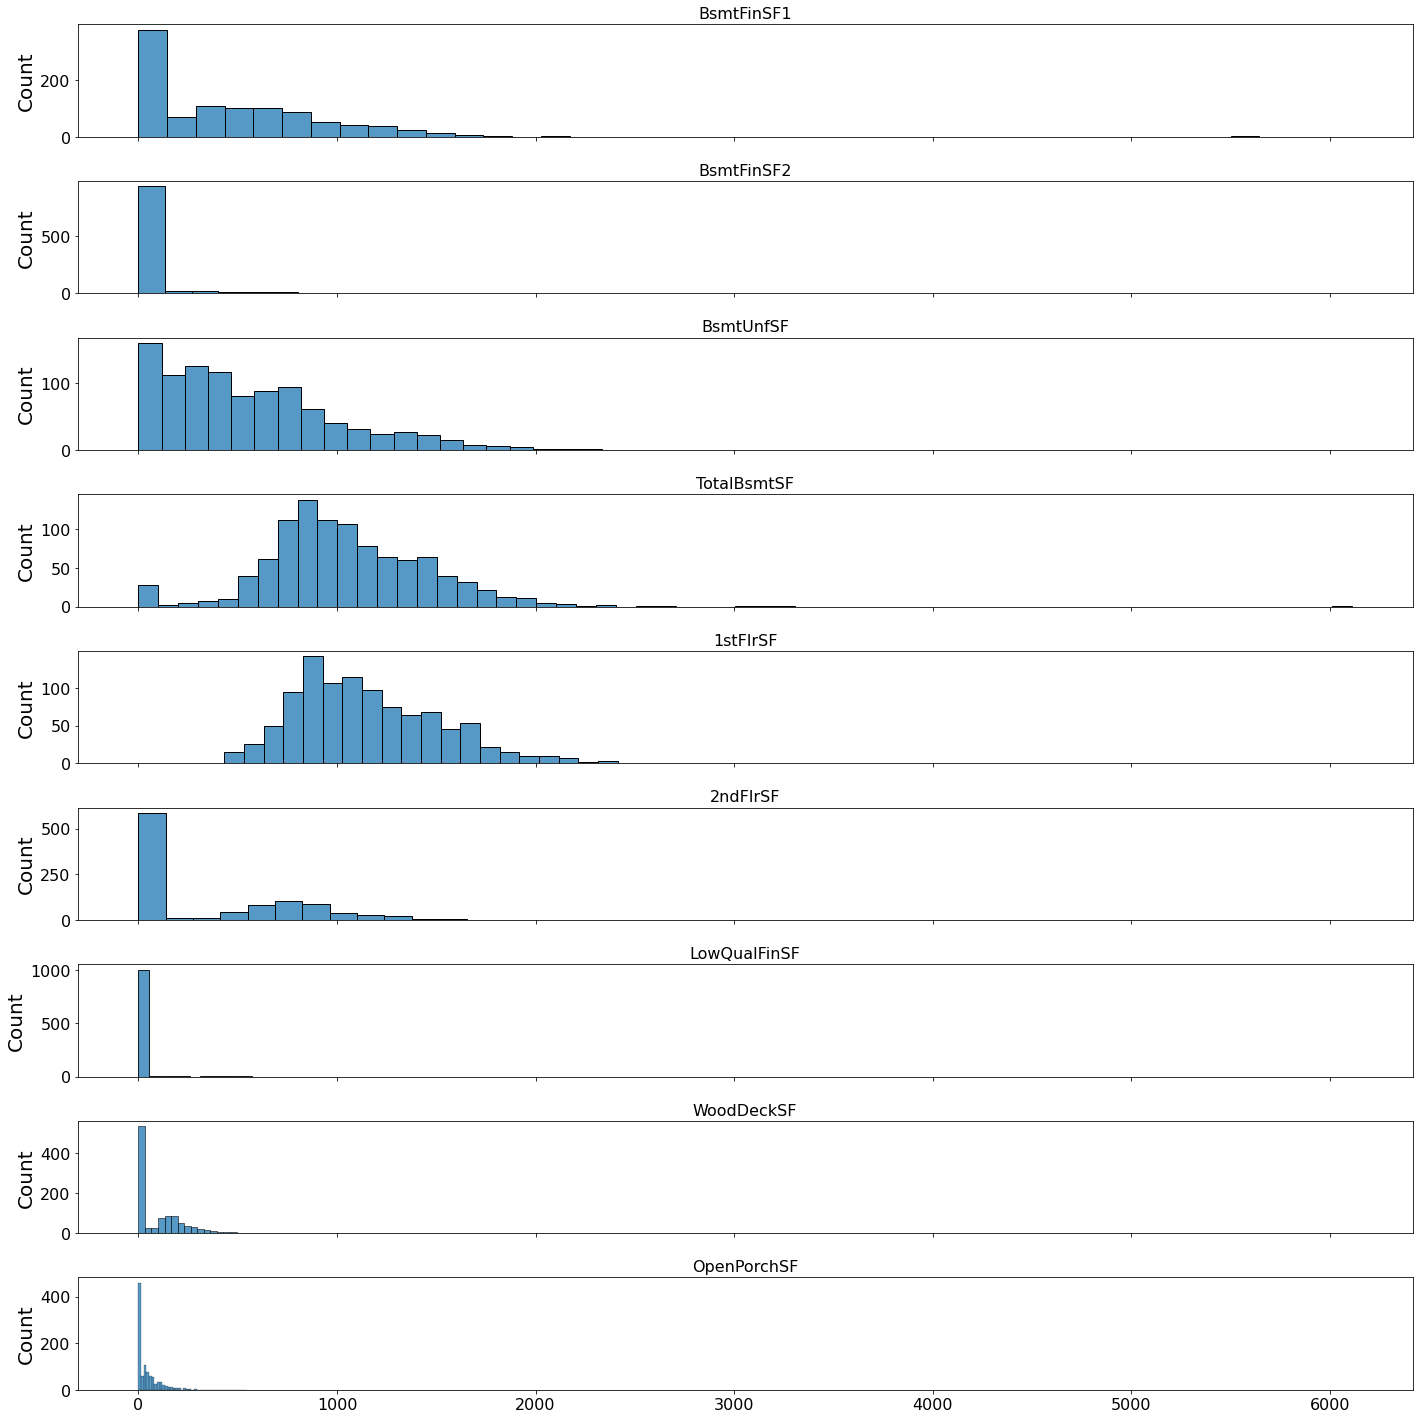

In [15]:
sf_cols = X_train.filter(regex='SF($|[0-9])').columns

fig,axs = plt.subplots(figsize=(20,20),nrows=len(sf_cols),sharex=True)

for col,ax in zip(sf_cols,axs):
    ax.set_title(col)
    sns.histplot(X_train[col],ax=ax)
    ax.set_xlabel('')
fig.tight_layout()
plt.show()

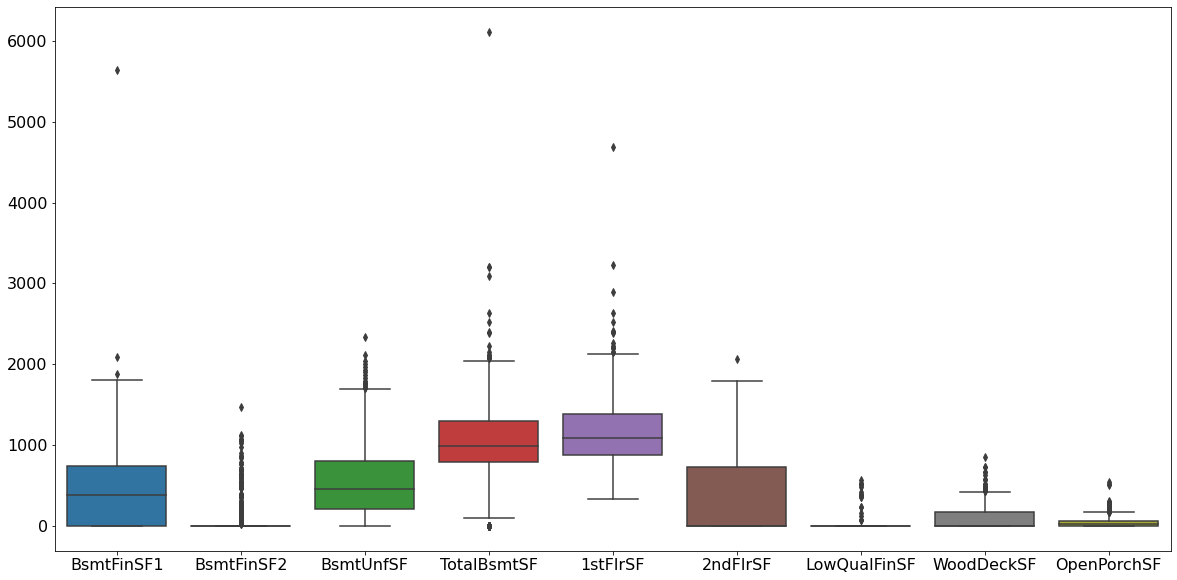

In [16]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[sf_cols],ax=axs)

plt.show()

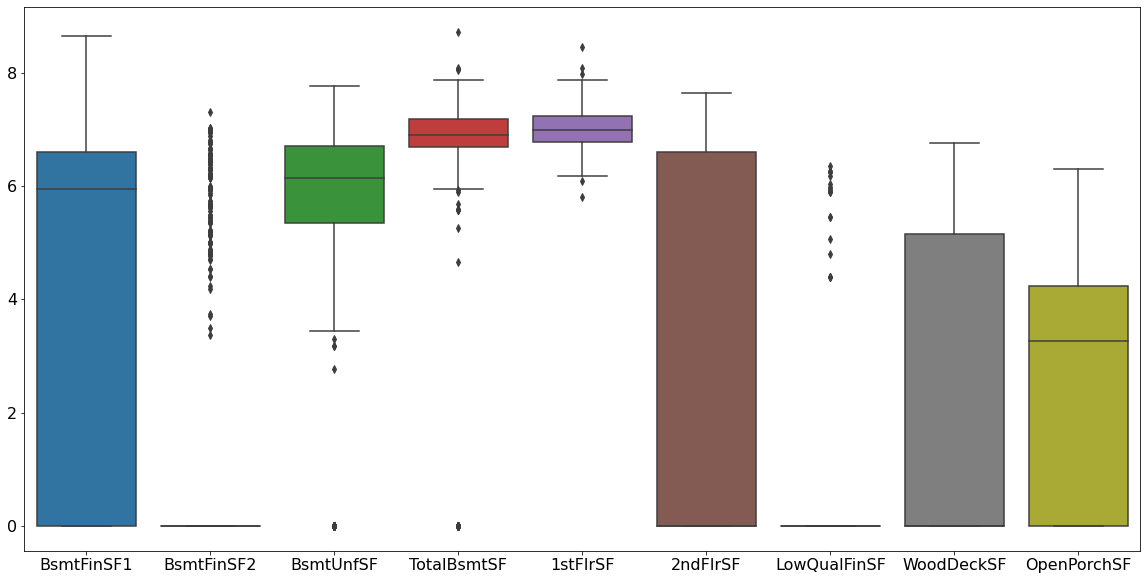

In [17]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[sf_cols].applymap(np.log1p),ax=axs)

plt.show()

In [18]:
sf_cols

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [19]:
colunas_tratadas['BsmtFinSF1']='log'
colunas_tratadas['BsmtFinSF2']='log'
colunas_tratadas['BsmtUnfSF']='log'
colunas_tratadas['TotalBsmtSF']='log'
colunas_tratadas['1stFlrSF']='log'
colunas_tratadas['2ndFlrSF']='log'
colunas_tratadas['LowQualFinSF']='log'
colunas_tratadas['WoodDeckSF']='log'
colunas_tratadas['OpenPorchSF']='log'

- For SF features, Log + Scailing should be effective

## Type features

In [20]:
X_train.filter(regex='Type$')

,BldgType,MasVnrType,GarageType,SaleType
435,1Fam,None,Attchd,ConLw
1166,1Fam,Stone,Attchd,WD
935,1Fam,BrkFace,Detchd,WD
588,1Fam,None,Attchd,WD
80,1Fam,BrkFace,Attchd,WD
...,...,...,...,...
1389,1Fam,None,Detchd,WD
618,1Fam,BrkFace,Attchd,New
227,Twnhs,BrkFace,Detchd,WD
713,2fmCon,BrkFace,Detchd,WD


In [21]:
type_cols=X_train.filter(regex='Type($|[0-9])').columns

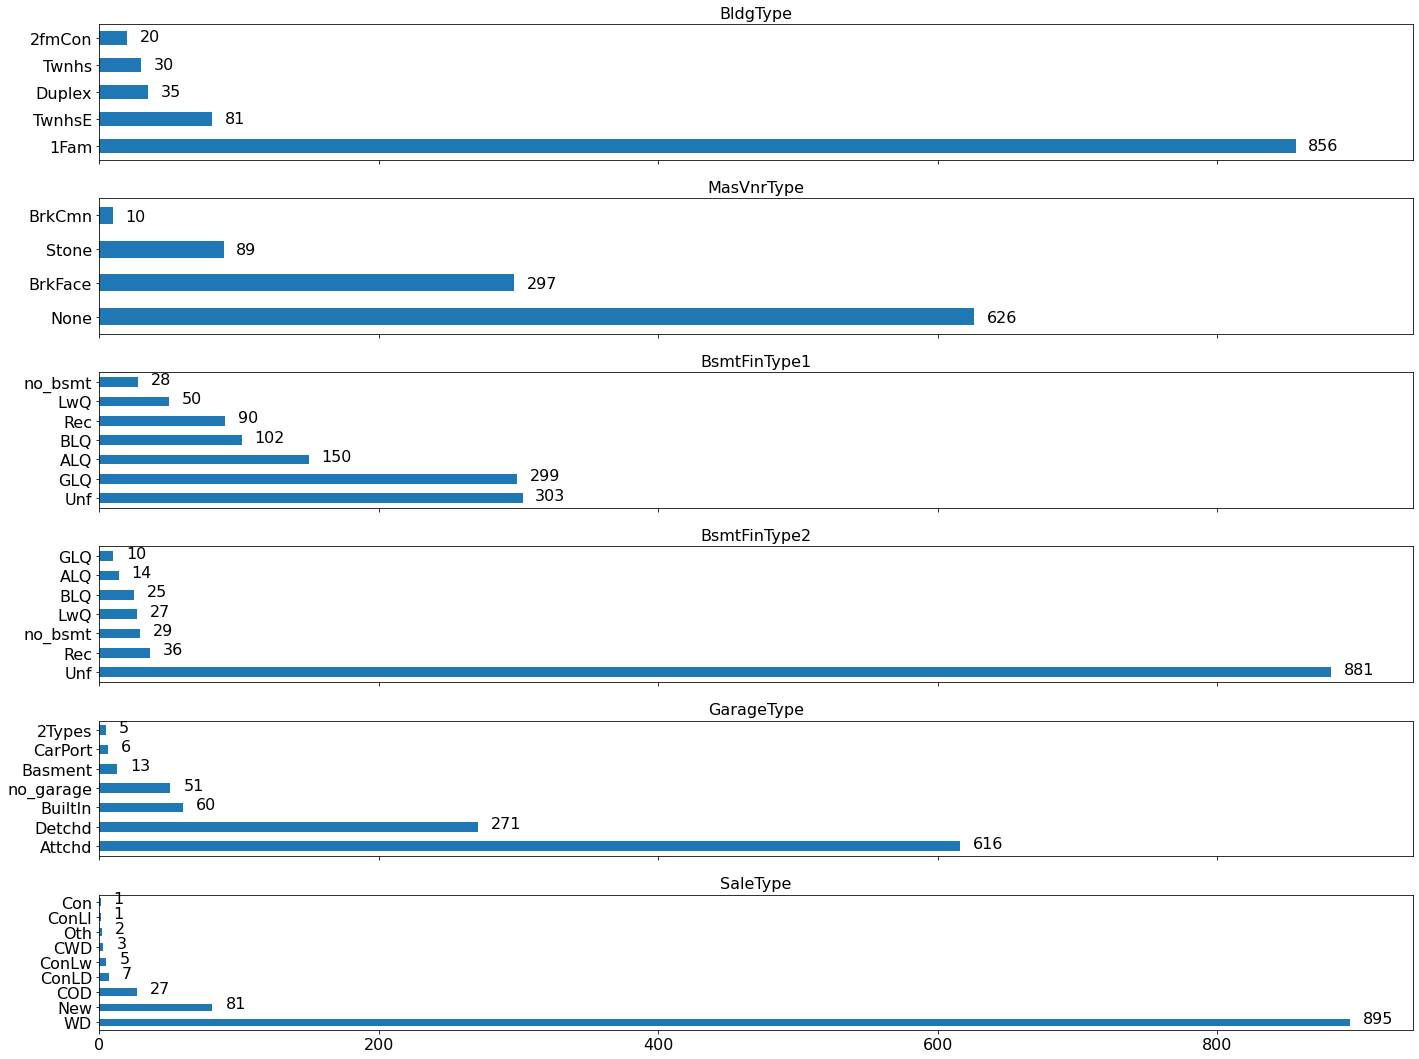

In [22]:
fig,axs = plt.subplots(figsize=(20,15),nrows=len(type_cols),sharex=True)

for col,ax in zip(type_cols,axs):
    ax.set_title(col)
    X_train[col].value_counts().plot(kind='barh',ax=ax)
    ax.set_xlabel('')
    add_labels(ax,type_='horizontal')

fig.tight_layout()
plt.show()

In [23]:
type_cols

Index(['BldgType', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'SaleType'],
      dtype='object')

In [24]:
colunas_tratadas['BldgType']='onehot'
colunas_tratadas['MasVnrType']='onehot'
colunas_tratadas['GarageType']='onehot'
colunas_tratadas['BsmtFinType1']='onehot'
colunas_tratadas['BsmtFinType2']='onehot'
colunas_tratadas['SaleType']='onehot_with_other'

For SaleType, due to the lack of examples in Con types, it'll be aggregated into other

For other objects, OneHotEncoder, should be effective

## Condition

In [25]:
X_train.filter(regex='(?i)cond')

,Condition1,Condition2,OverallCond,ExterCond,BsmtCond,GarageCond,SaleCondition
435,PosN,Norm,6,TA,TA,TA,Normal
1166,Norm,Norm,5,TA,TA,TA,Normal
935,Norm,Norm,5,Gd,TA,TA,Normal
588,Norm,Norm,8,TA,TA,TA,Partial
80,Norm,Norm,6,Gd,TA,TA,Normal
...,...,...,...,...,...,...,...
1389,Norm,Norm,6,Gd,Gd,TA,Normal
618,Norm,Norm,5,TA,TA,TA,Partial
227,Norm,Norm,6,TA,TA,TA,Normal
713,RRAn,Norm,5,TA,TA,TA,Normal


In [26]:
cond_cols = X_train.filter(regex='(?i)cond').columns

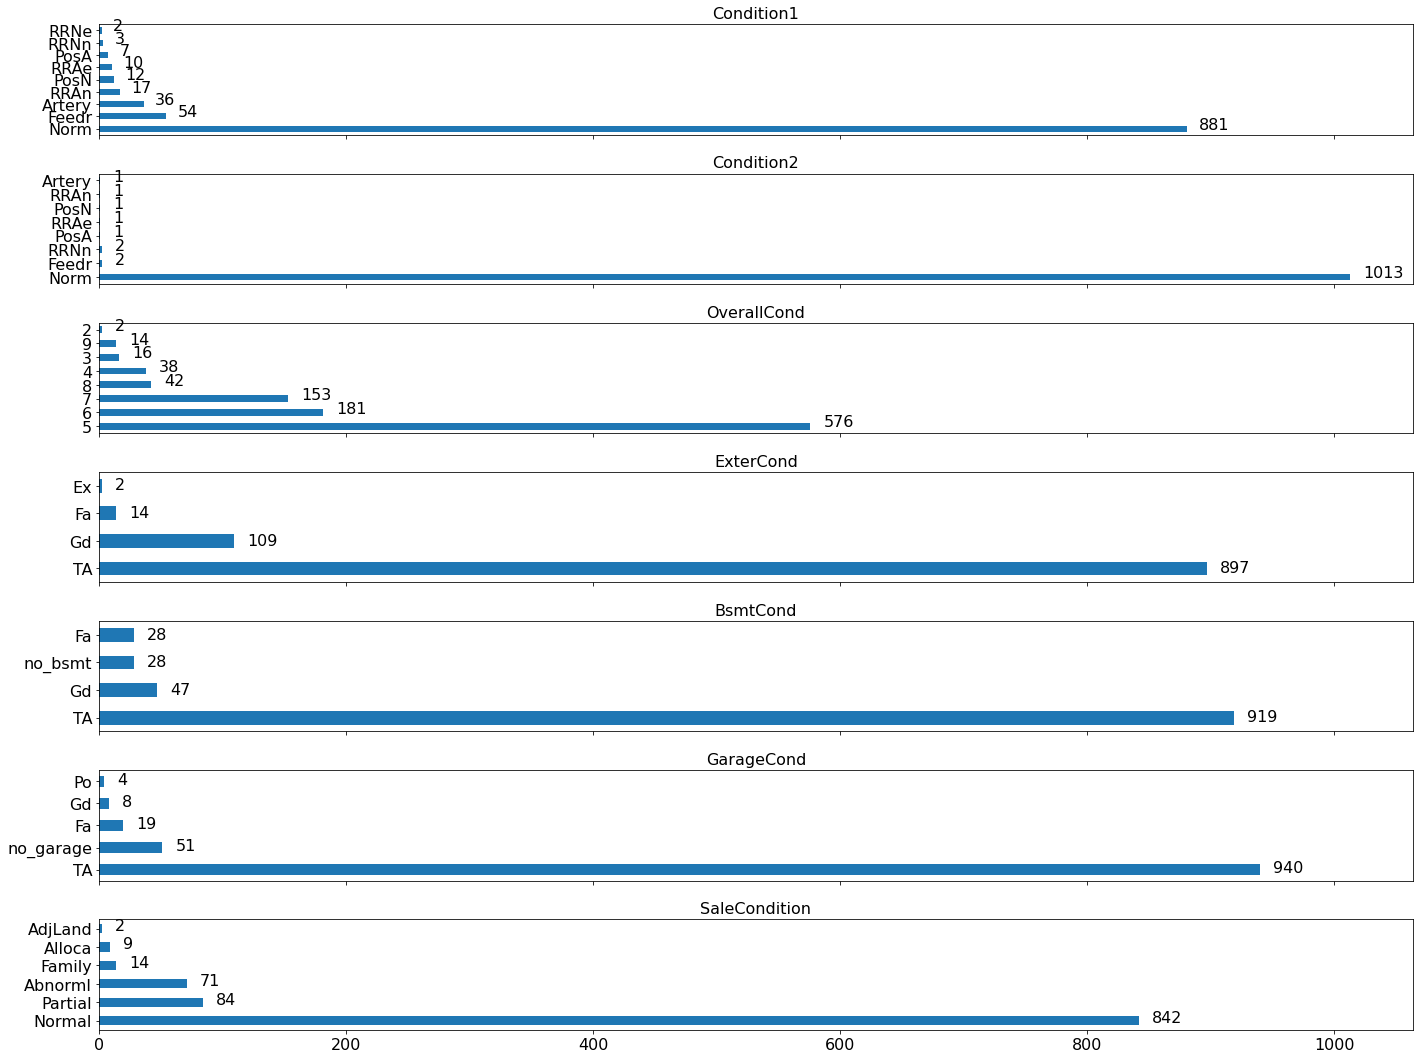

In [27]:
fig,axs = plt.subplots(figsize=(20,15),nrows=len(cond_cols),sharex=True)

for col,ax in zip(cond_cols,axs):
    ax.set_title(col)
    X_train[col].value_counts().plot(kind='barh',ax=ax)
    ax.set_xlabel('')
    add_labels(ax,type_='horizontal')

fig.tight_layout()
plt.show()

In [28]:
cond_cols

Index(['Condition1', 'Condition2', 'OverallCond', 'ExterCond', 'BsmtCond',
       'GarageCond', 'SaleCondition'],
      dtype='object')

In [29]:
colunas_tratadas['Condition1']='onehot'
colunas_tratadas['Condition2']='onehot_with_other'
colunas_tratadas['OverallCond']='onehot'
colunas_tratadas['ExterCond']='onehot'
colunas_tratadas['BsmtCond']='onehot'
colunas_tratadas['GarageCond']='onehot'
colunas_tratadas['SaleCondition']='onehot'

### Area Features

In [30]:
X_train.filter(regex='(?i)area')

,LotArea,MasVnrArea,GrLivArea,GarageArea,PoolArea
435,10667,0.0,1661,550,0
1166,10475,72.0,1694,776,0
935,5825,108.0,747,528,0
588,25095,0.0,1473,452,0
80,13000,576.0,2142,509,0
...,...,...,...,...,...
1389,6000,0.0,1218,440,0
618,11694,452.0,1828,774,0
227,1869,127.0,987,280,0
713,9873,160.0,960,576,0


In [31]:
area_cols = X_train.filter(regex='(?i)area').columns

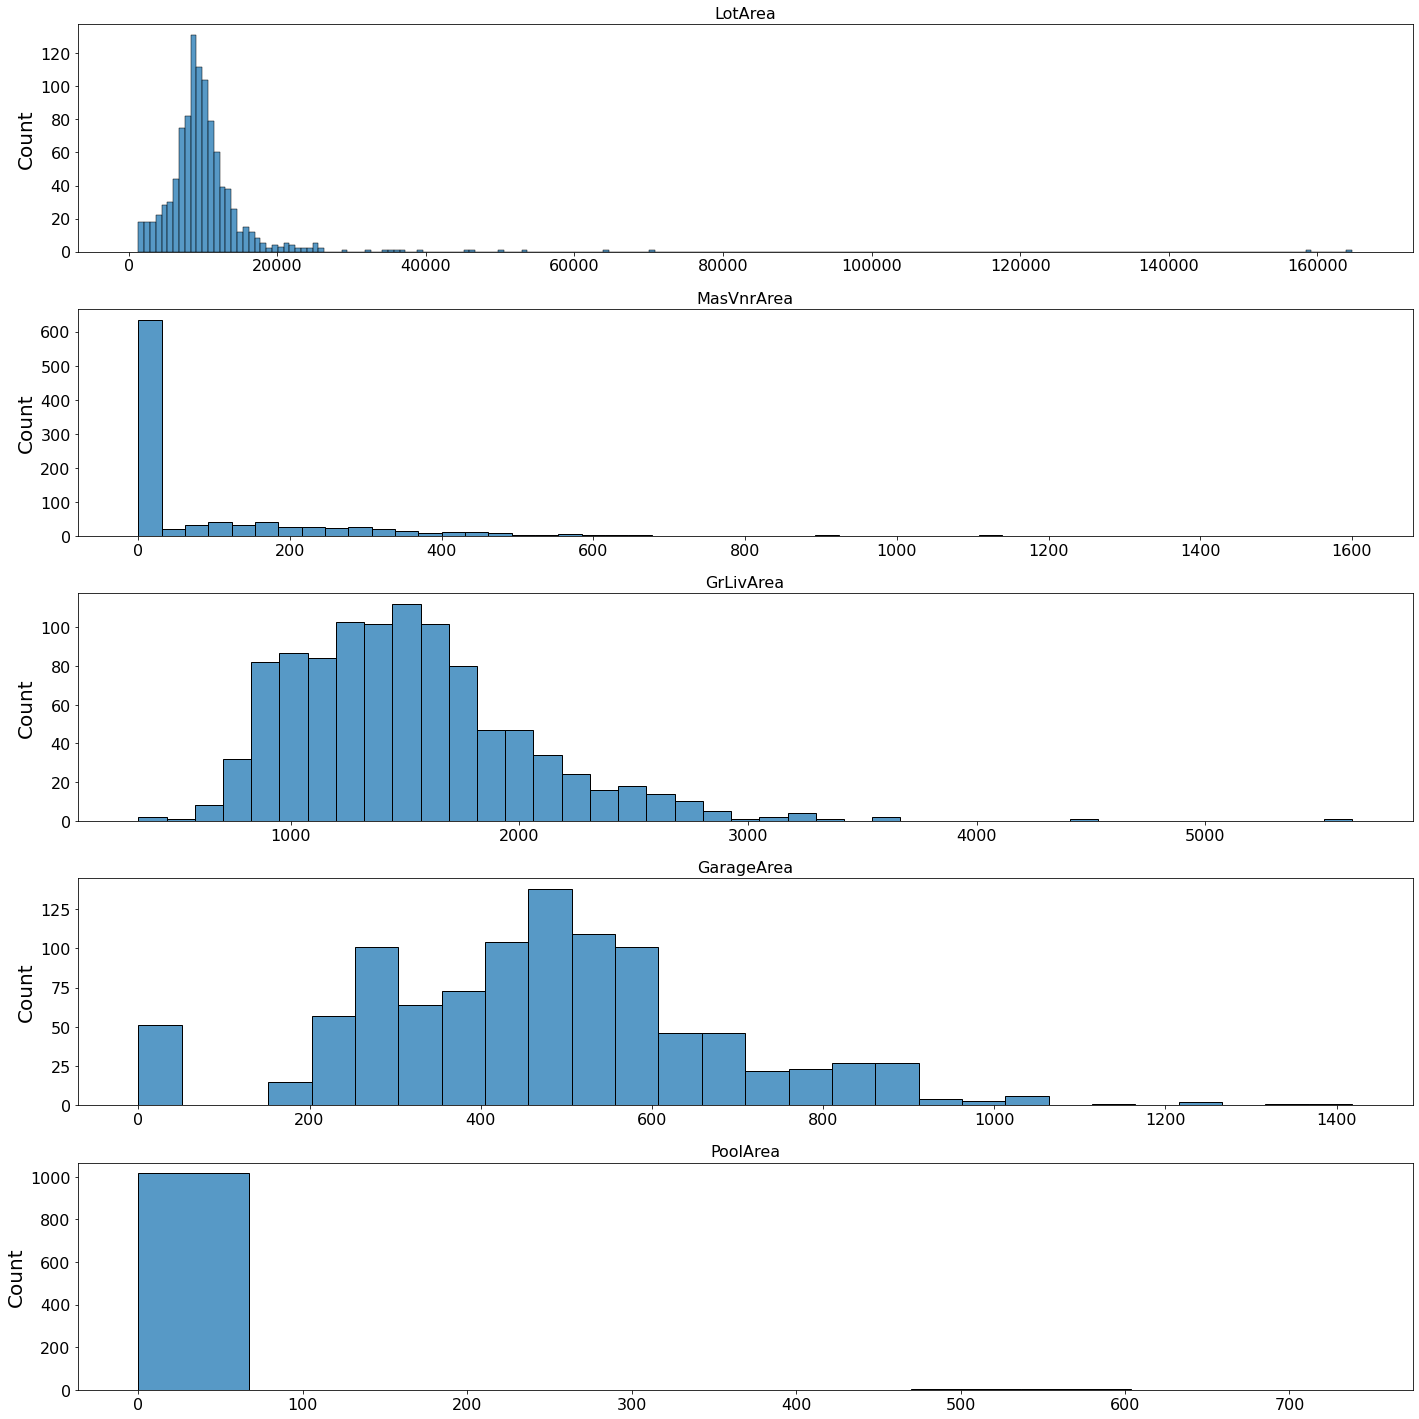

In [32]:
fig,axs = plt.subplots(figsize=(20,20),nrows=len(area_cols))

for col,ax in zip(area_cols,axs):
    ax.set_title(col)
    sns.histplot(X_train[col],ax=ax)
    ax.set_xlabel('')
fig.tight_layout()
plt.show()

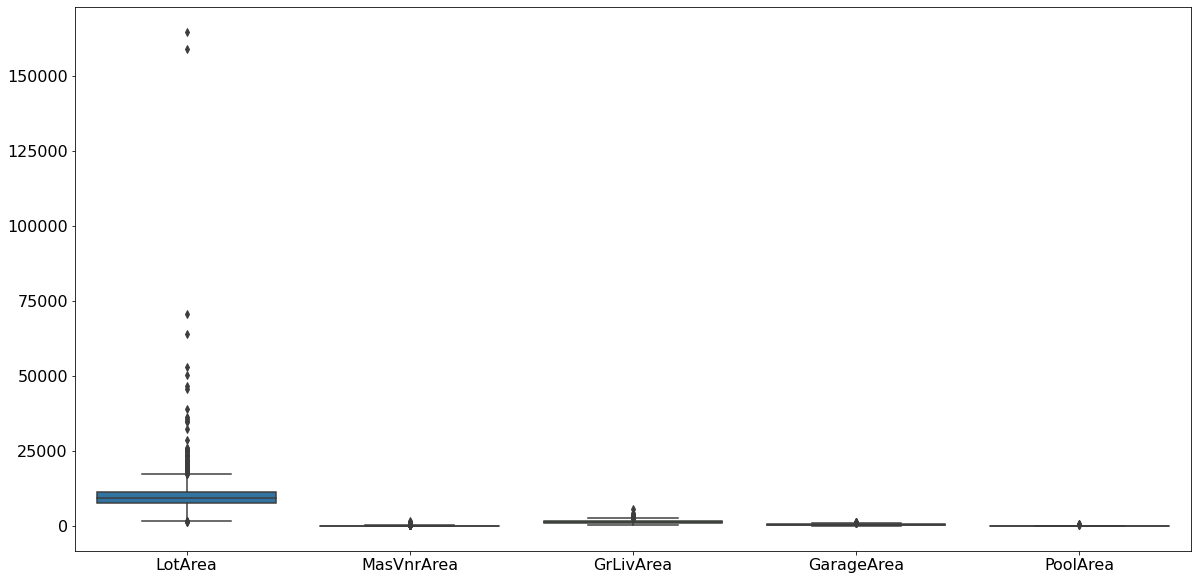

In [33]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[area_cols],ax=axs)

plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler

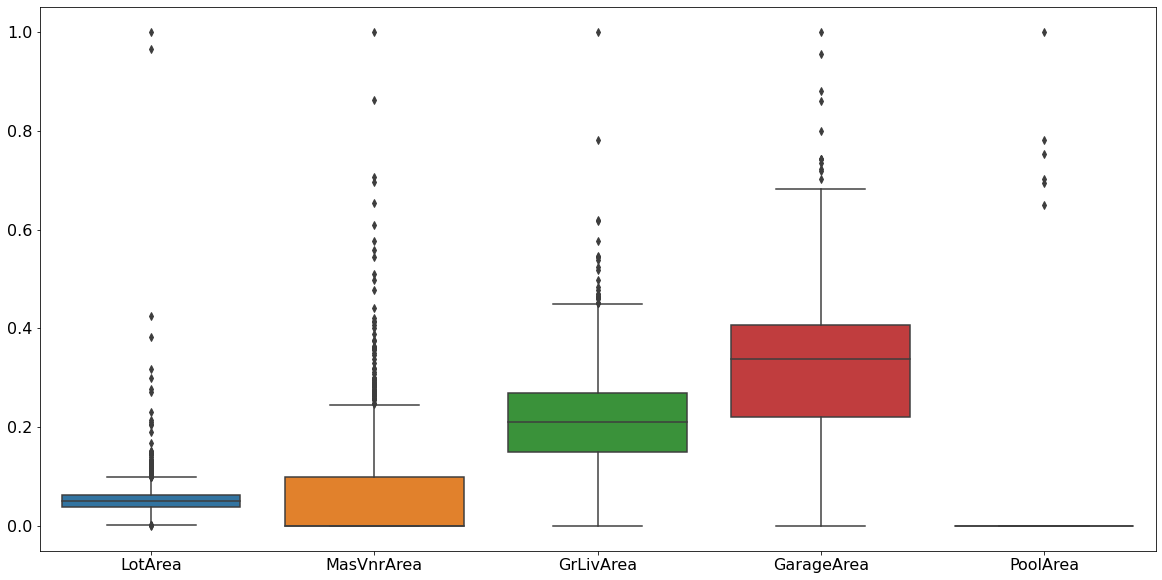

In [35]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=pd.DataFrame(MinMaxScaler().fit_transform(X_train[area_cols]),columns=area_cols),ax=axs)

plt.show()

In [36]:
area_cols

Index(['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea'], dtype='object')

In [37]:
colunas_tratadas['LotArea'] = 'log'
colunas_tratadas['MasVnrArea'] = ''
colunas_tratadas['GrLivArea'] = ''
colunas_tratadas['GarageArea'] = ''
colunas_tratadas['PoolArea'] = ''

## Colunas de data

In [38]:
X_train.filter(regex='(Yr)|(Year)')

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
435,1996,1996,1996.0,2009
1166,2008,2008,2008.0,2010
935,1926,1953,1953.0,2006
588,1968,2003,1968.0,2009
80,1968,1968,1968.0,2009
...,...,...,...,...
1389,1941,1950,2003.0,2007
618,2007,2007,2007.0,2007
227,1970,1970,1987.0,2008
713,1970,1970,1970.0,2006


In [39]:
X_train['Grg_age'] = X_train['YrSold']-X_train['GarageYrBlt']
X_train['House_age'] = X_train['YrSold']-X_train['YearBuilt']
X_train['Remod_age'] = X_train['YrSold']-X_train['YearRemodAdd']

X_test['Grg_age'] = X_test['YrSold']-X_test['GarageYrBlt']
X_test['House_age'] = X_test['YrSold']-X_test['YearBuilt']
X_test['Remod_age'] = X_test['YrSold']-X_test['YearRemodAdd']

In [40]:
colunas_tratadas['Grg_age'] = ''
colunas_tratadas['House_age'] = ''
colunas_tratadas['Remod_age'] = ''
colunas_tratadas['YrSold'] = ''
colunas_tratadas['YearRemodAdd'] = ''
colunas_tratadas['GarageYrBlt'] = ''
colunas_tratadas['YearBuilt'] = ''

## Missing columns

In [41]:
set(X_train.columns)-set(colunas_tratadas.keys())

{'3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'EnclosedPorch',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageCars',
 'GarageFinish',
 'GarageQual',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OverallQual',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',
 'Utilities'}

### 3SsnPorch

In [43]:
X_train['3SsnPorch'].dtype

dtype('int64')

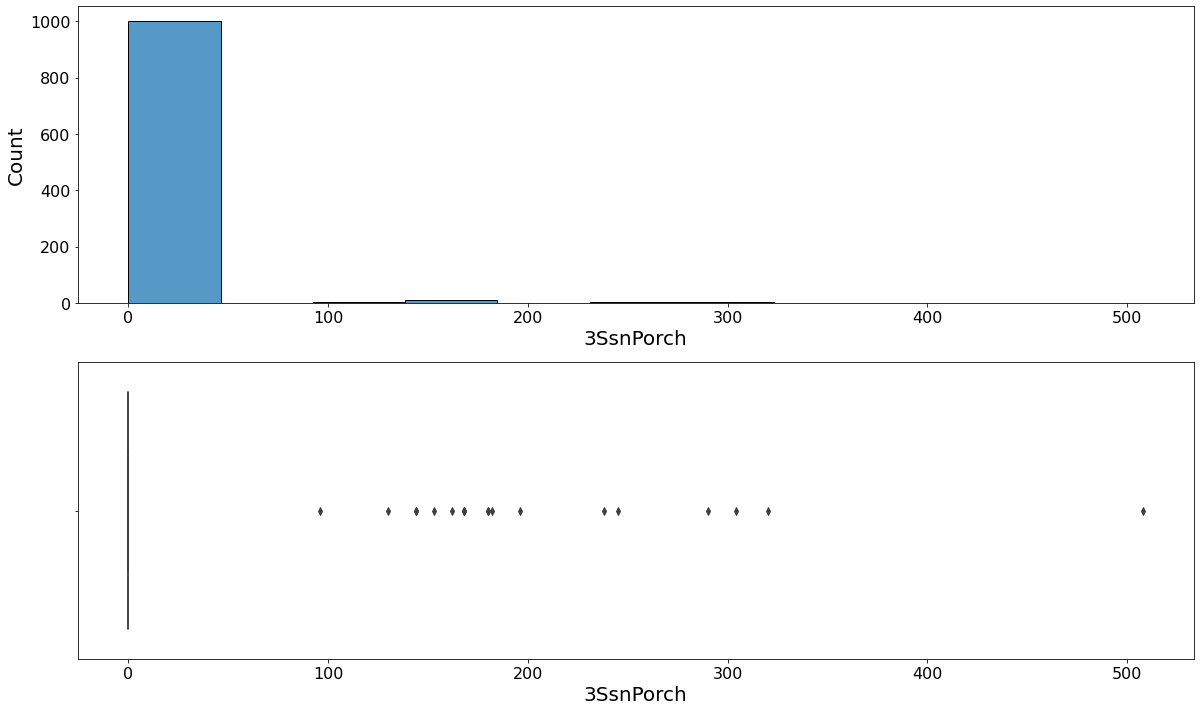

In [44]:
investigate_nmr(X_train['3SsnPorch'])

In [45]:
colunas_tratadas['3SsnPorch']=''

### Alley

In [46]:
X_train['Alley'].dtype

dtype('O')

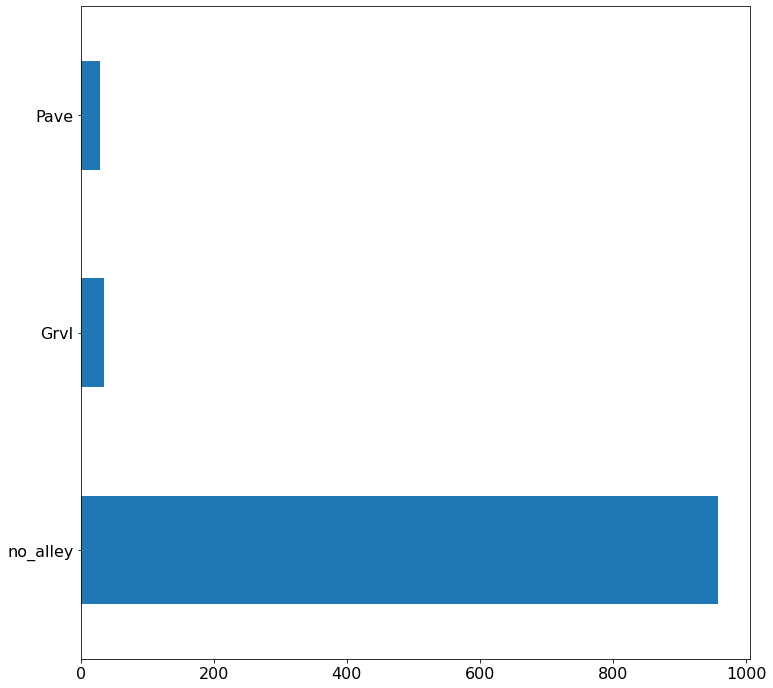

In [47]:
investigate_string(X_train['Alley'])

In [48]:
colunas_tratadas['Alley'] = 'onehot'

### BedroomAbvGr

In [49]:
X_train['BedroomAbvGr'].dtype

dtype('int64')

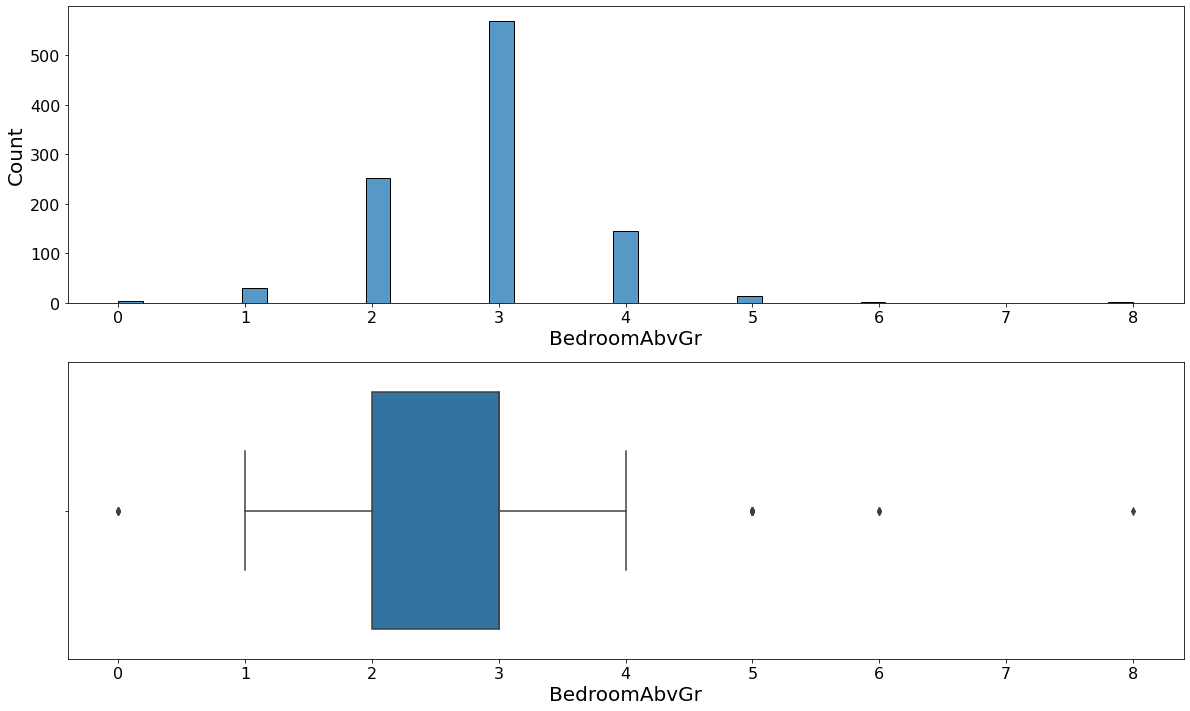

In [50]:
investigate_nmr(X_train['BedroomAbvGr'])

In [51]:
colunas_tratadas['BedroomAbvGr'] = ''

### BsmtExposure

In [52]:
X_train['BsmtExposure'].dtype

dtype('O')

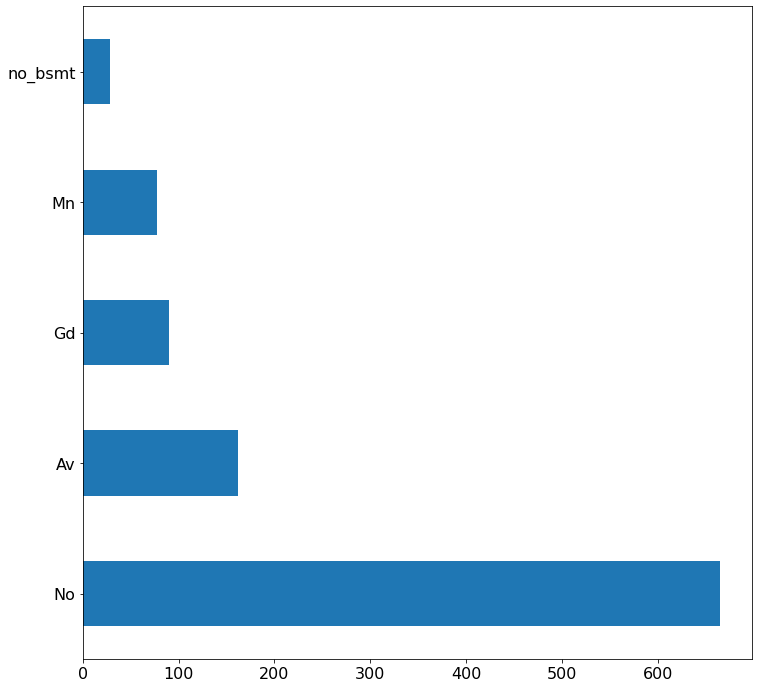

In [53]:
investigate_string(X_train['BsmtExposure'])

In [54]:
colunas_tratadas['BsmtExposure'] = 'onehot'

### BsmtFullBath

In [55]:
X_train['BsmtFullBath'].dtype

dtype('int64')

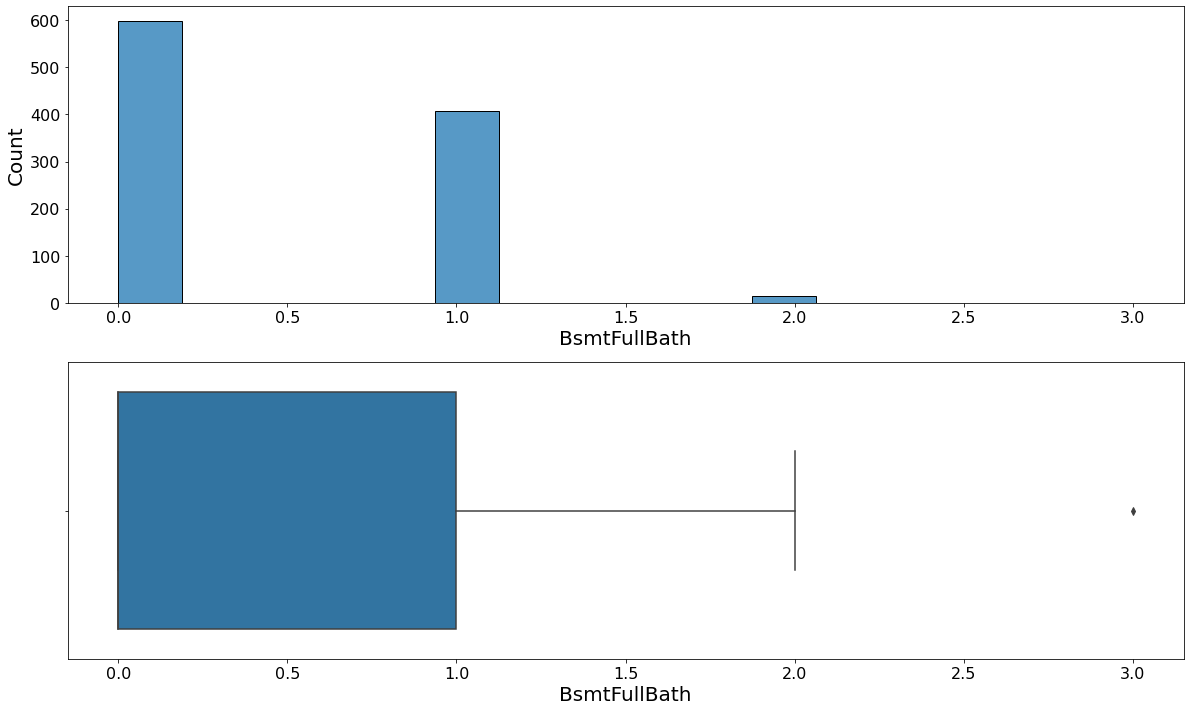

In [56]:
investigate_nmr(X_train['BsmtFullBath'])

In [57]:
colunas_tratadas['BsmtFullBath'] = ''
colunas_tratadas['BsmtHalfBath'] = ''

### BsmtQual

In [58]:
X_train['BsmtQual'].dtype

dtype('O')

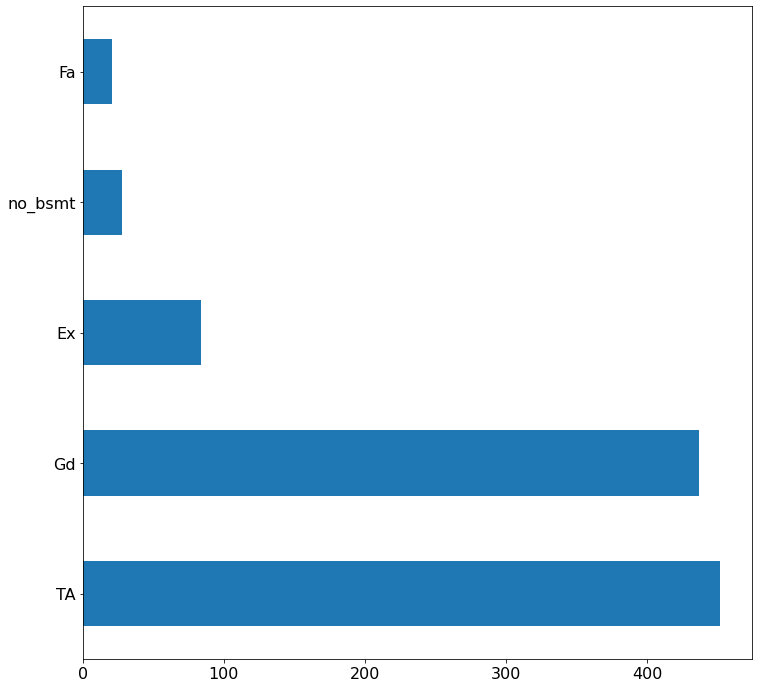

In [59]:
investigate_string(X_train['BsmtQual'])

In [60]:
colunas_tratadas['BsmtQual'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70,'no_bsmt':0}

### CentralAir

In [61]:
X_train['CentralAir'].dtype

dtype('O')

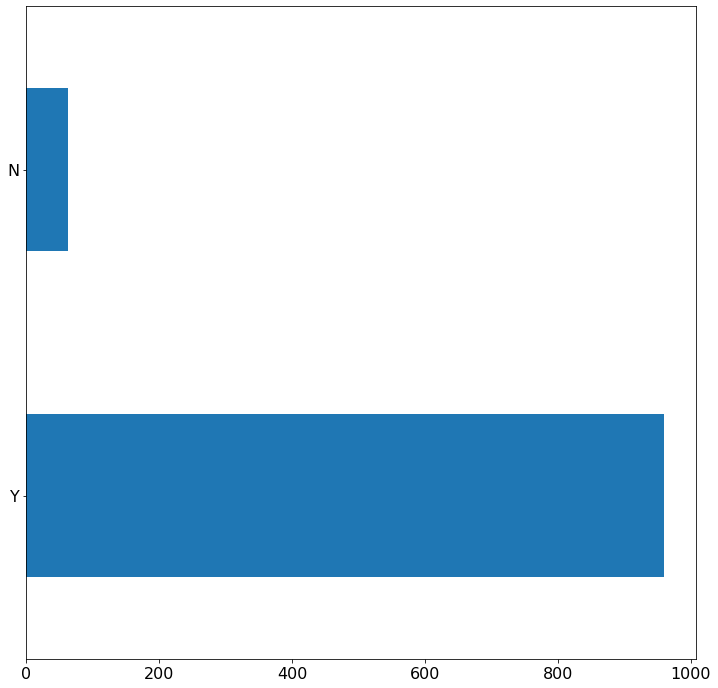

In [62]:
investigate_string(X_train['CentralAir'])

In [63]:
colunas_tratadas['CentralAir'] = {'Y':1,'N':0}

### Electrical

In [64]:
X_train['Electrical'].dtype

dtype('O')

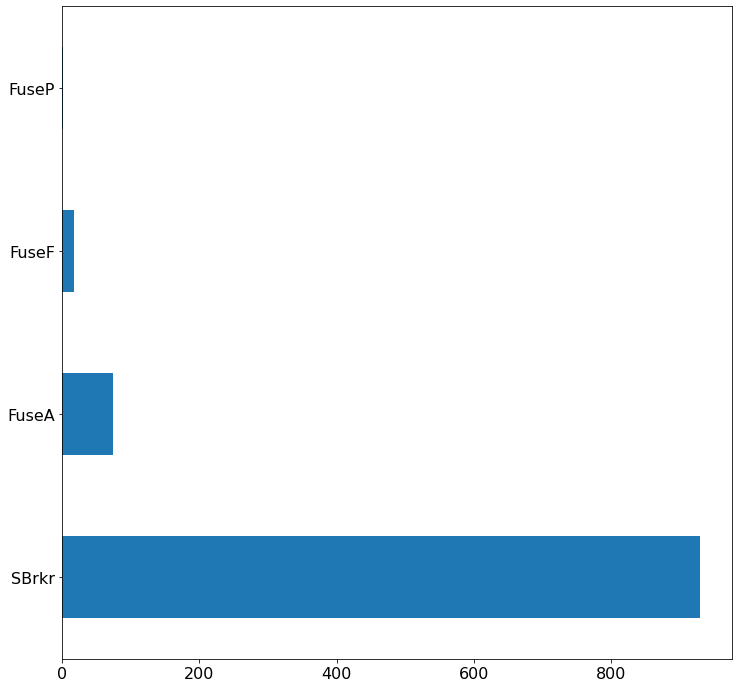

In [65]:
investigate_string(X_train['Electrical'])

In [66]:
colunas_tratadas['Electrical'] = 'onehot'

### EnclosedPorch

In [67]:
X_train['EnclosedPorch'].dtype

dtype('int64')

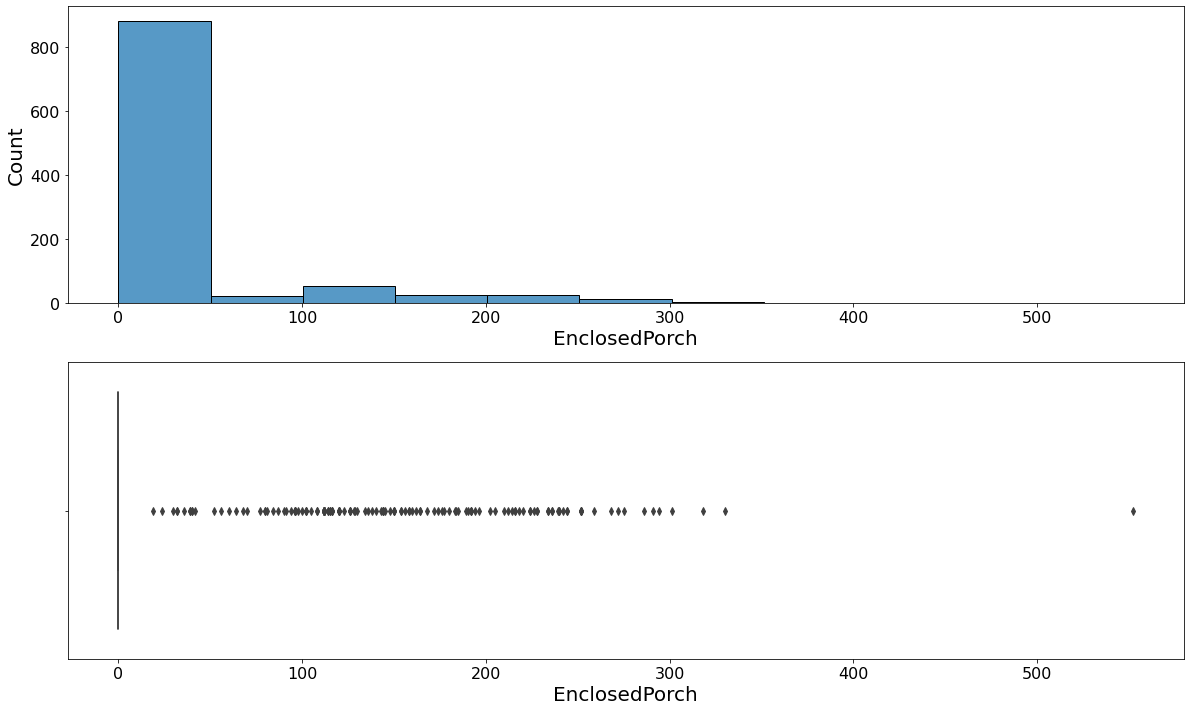

In [68]:
investigate_nmr(X_train['EnclosedPorch'])

In [69]:
colunas_tratadas['EnclosedPorch'] = ''

### ExterQual 

In [70]:
X_train['ExterQual'].dtype

dtype('O')

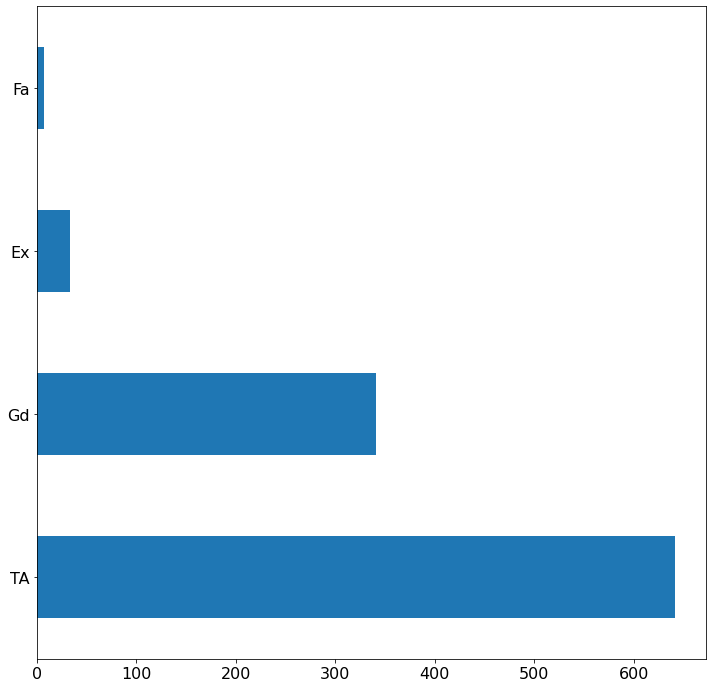

In [71]:
investigate_string(X_train['ExterQual'])

In [72]:
colunas_tratadas['ExterQual'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70}

### Exterior1st e Exterior2st

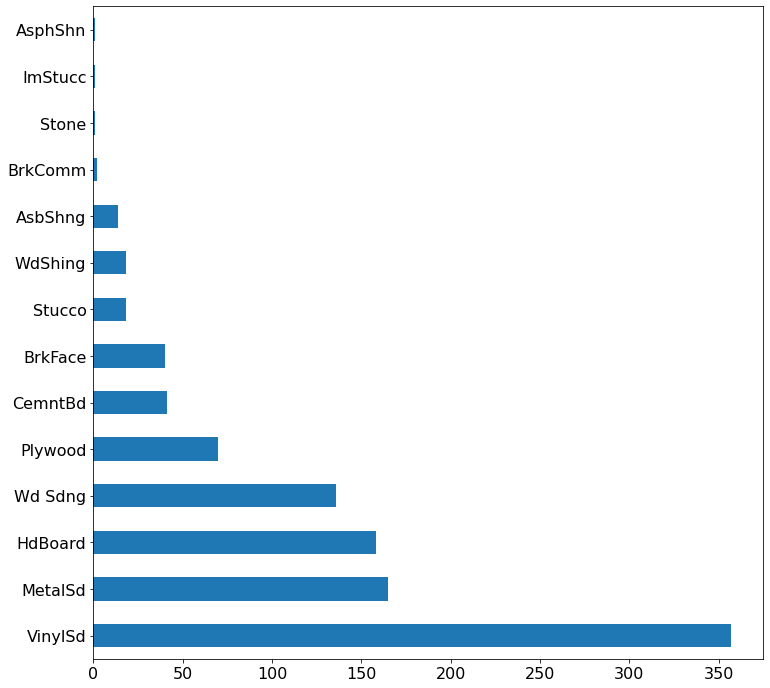

In [73]:
investigate_string(X_train['Exterior1st'])

In [74]:
colunas_tratadas['Exterior1st'] = 'onehot'
colunas_tratadas['Exterior2nd'] = 'onehot'

### Fence

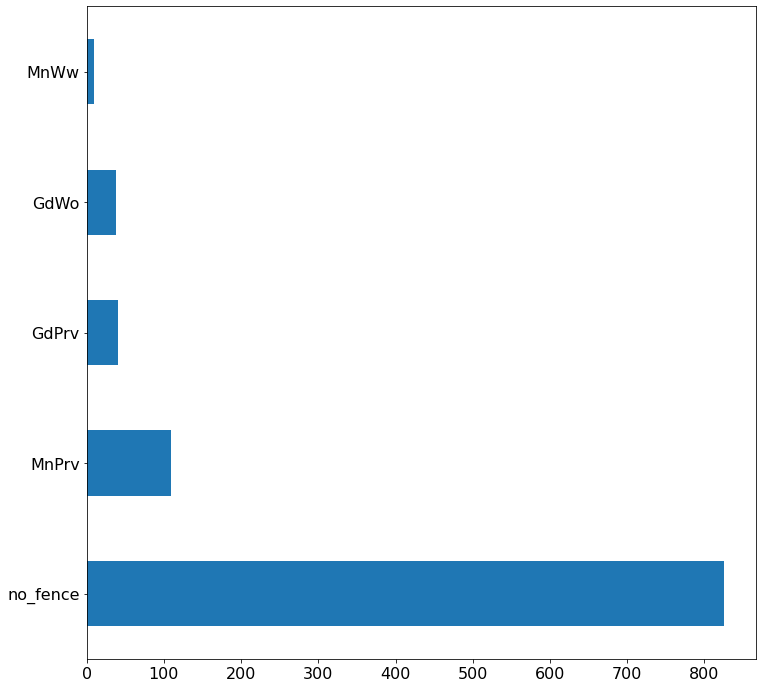

In [75]:
investigate_string(X_train['Fence'])

In [76]:
colunas_tratadas['Fence'] = 'onehot'

### FireplaceQu

In [77]:
X_train['FireplaceQu'].dtype

dtype('O')

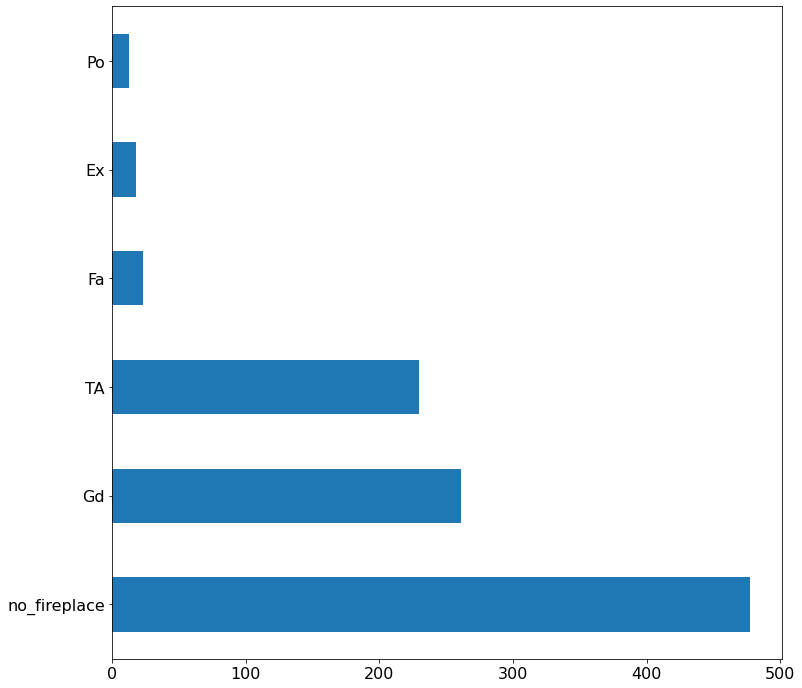

In [78]:
investigate_string(X_train['FireplaceQu'])

In [79]:
colunas_tratadas['FireplaceQu'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70,'no_fireplace':0}

### Fireplaces

In [80]:
X_train['Fireplaces'].dtype

dtype('int64')

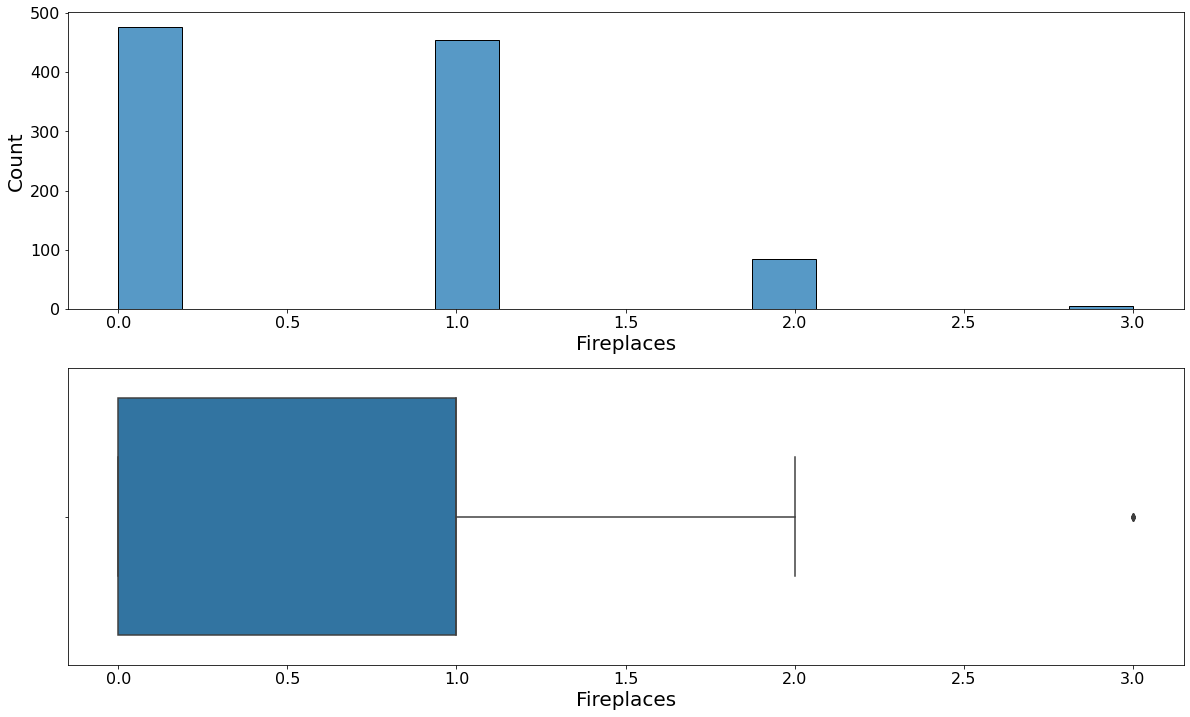

In [81]:
investigate_nmr(X_train['Fireplaces'])

In [82]:
colunas_tratadas['Fireplaces'] = ''

### Foundation

In [83]:
X_train['Foundation'].dtype

dtype('O')

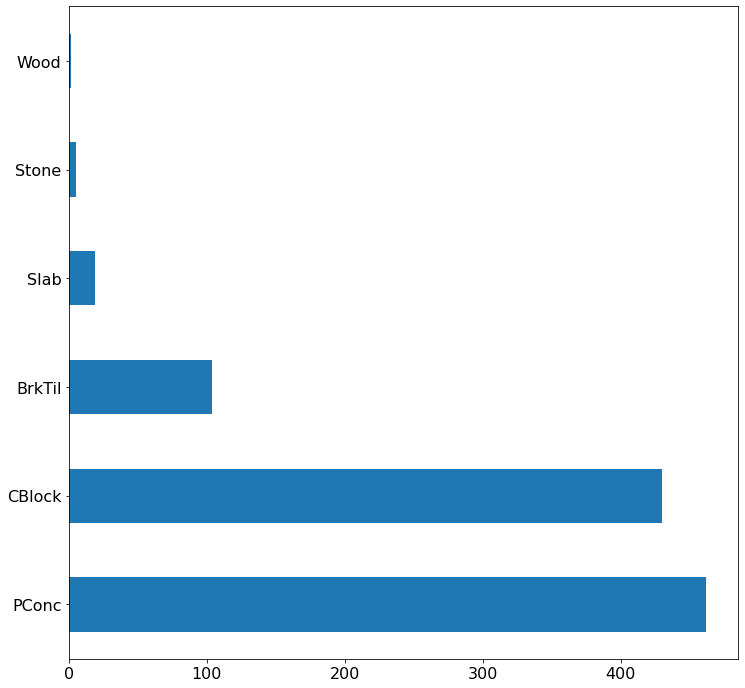

In [84]:
investigate_string(X_train['Foundation'])

In [85]:
colunas_tratadas['Foundation'] = 'onehot'

### FullBath

In [86]:
X_train['FullBath'].dtype

dtype('int64')

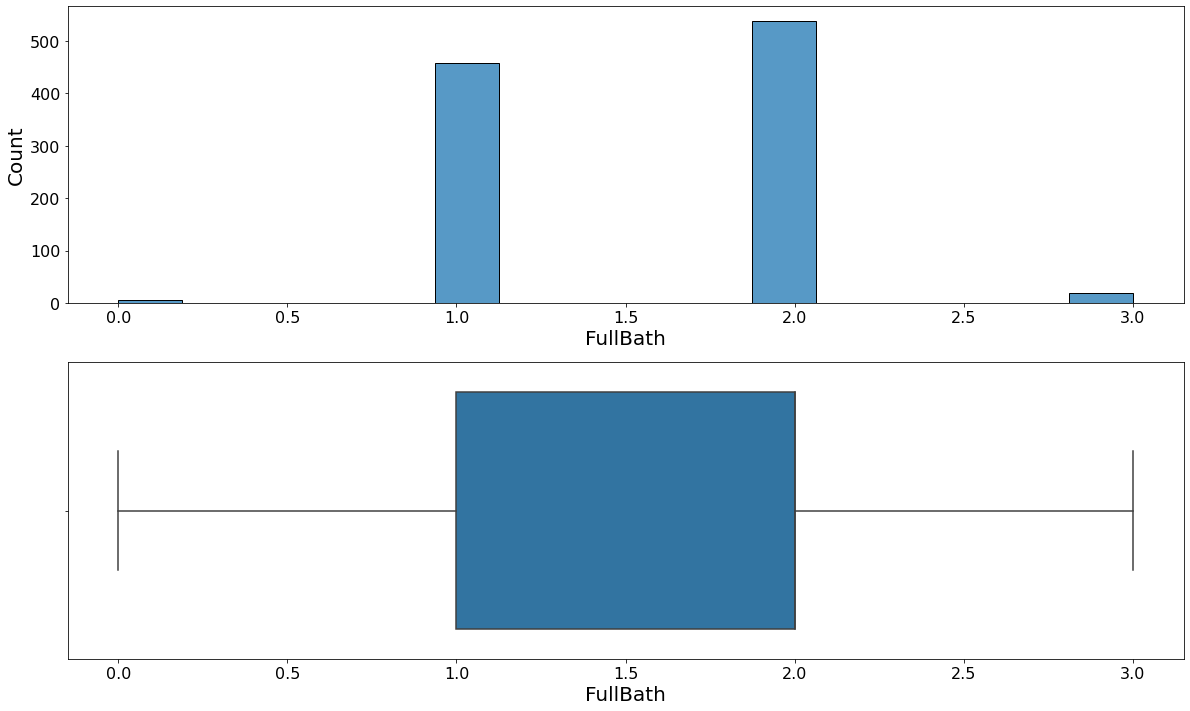

In [87]:
investigate_nmr(X_train['FullBath'])

In [88]:
colunas_tratadas['FullBath'] = ''

### Functional

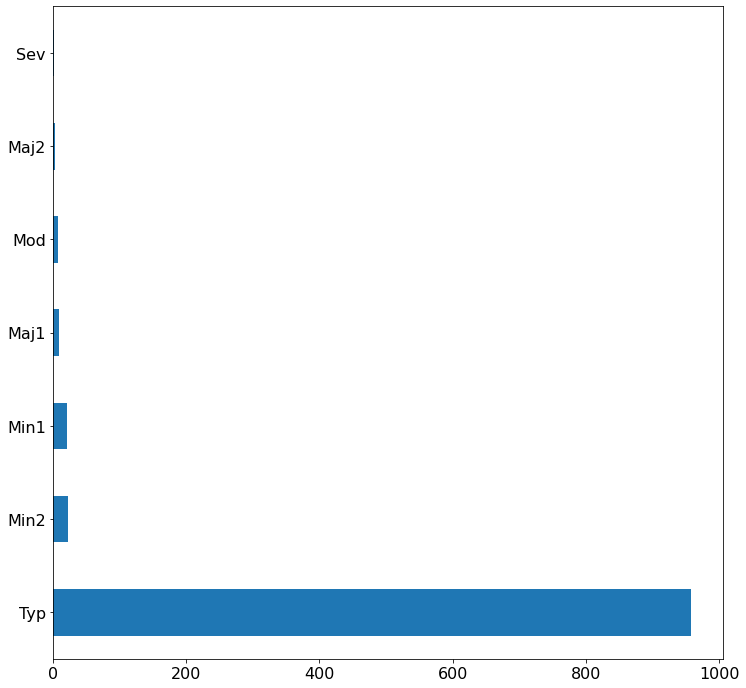

In [89]:
investigate_string(X_train['Functional'])

In [90]:
colunas_tratadas['Functional'] = {'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7}

### GarageCars

In [91]:
X_train['GarageCars'].dtype

dtype('int64')

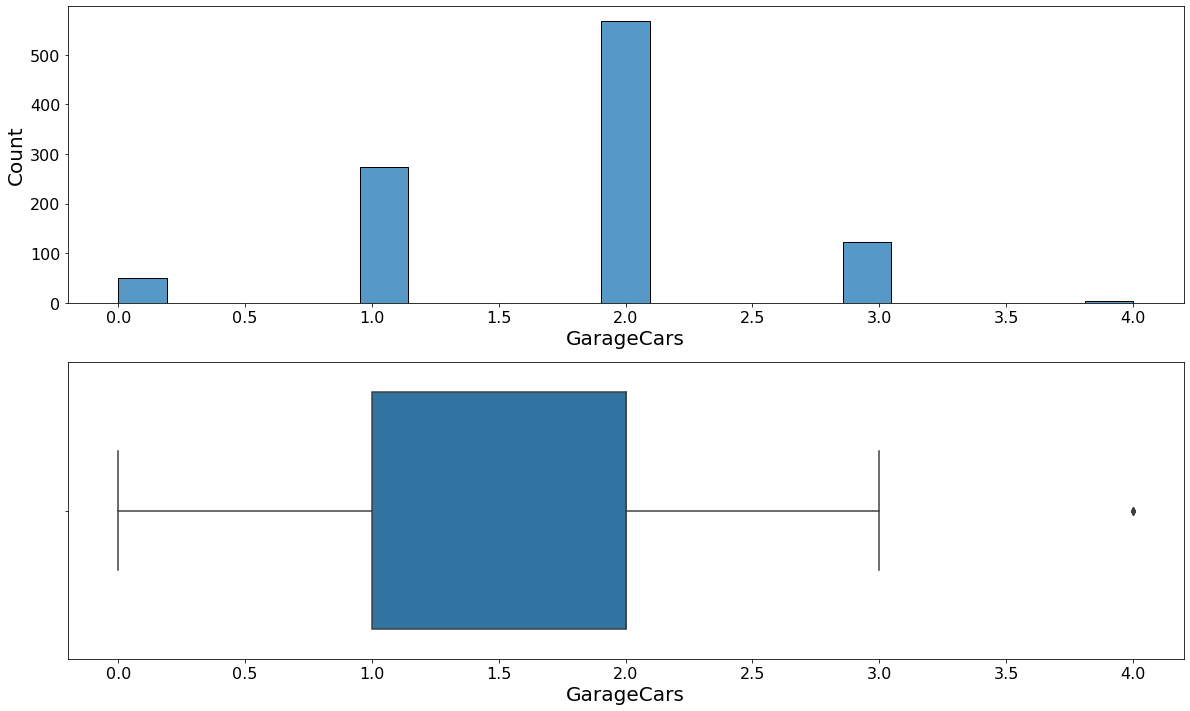

In [92]:
investigate_nmr(X_train['GarageCars'])

In [93]:
colunas_tratadas['GarageCars'] = ''

### GarageFinish

In [94]:
X_train['GarageFinish'].dtype

dtype('O')

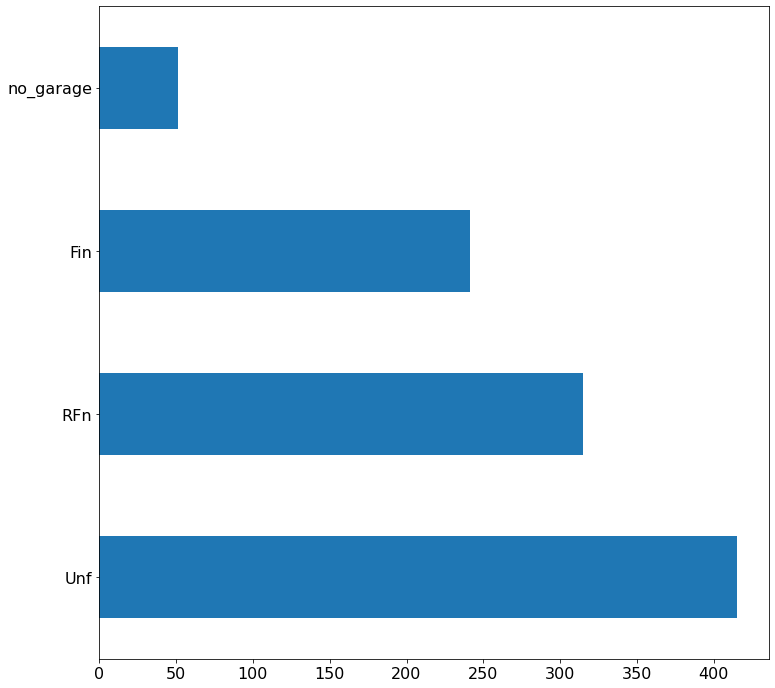

In [95]:
investigate_string(X_train['GarageFinish'])

In [96]:
colunas_tratadas['GarageFinish'] = {'Fin':0,'RFn':1,'Unf':2,'NA':3}

### GarageQual

In [97]:
X_train['GarageQual'].dtype

dtype('O')

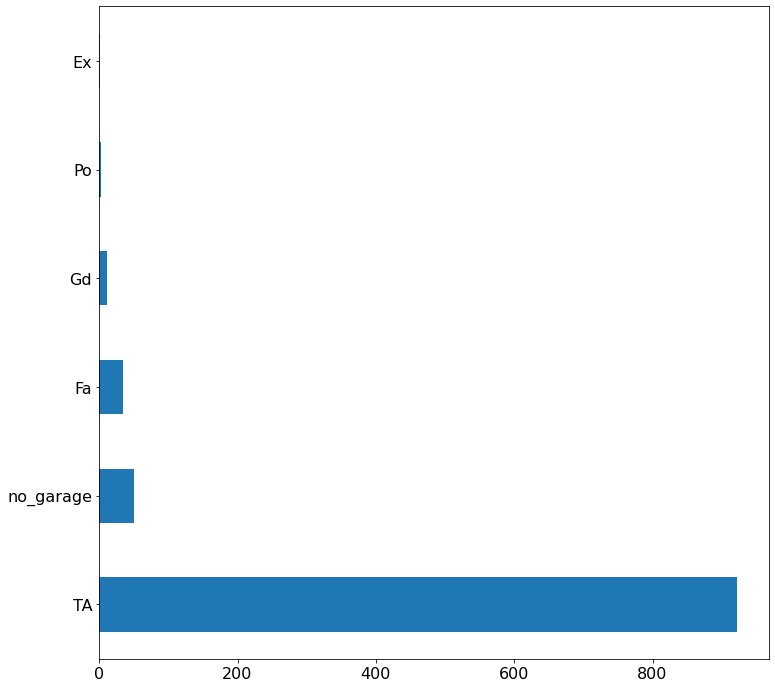

In [98]:
investigate_string(X_train['GarageQual'])

In [99]:
colunas_tratadas['GarageQual'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70,'no_garage':0}

### HalfBath

In [100]:
X_train['HalfBath'].dtype

dtype('int64')

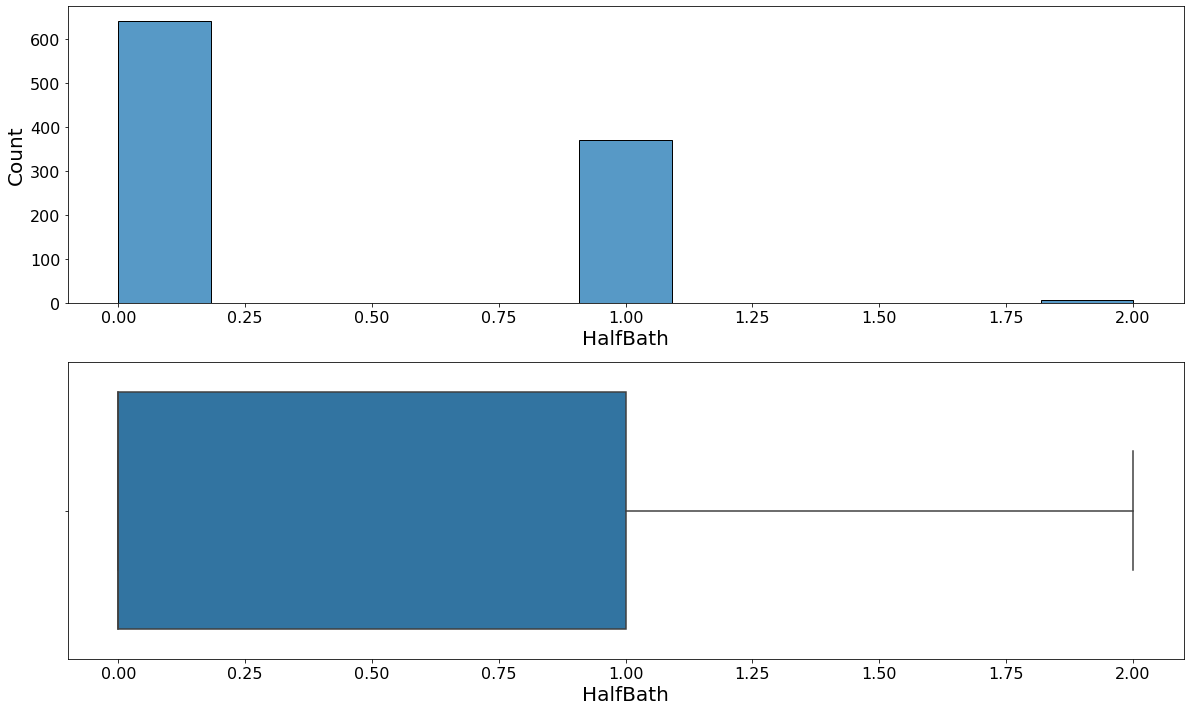

In [101]:
investigate_nmr(X_train['HalfBath'])

In [102]:
colunas_tratadas['HalfBath']=''

### Heating

In [103]:
X_train['Heating'].dtype

dtype('O')

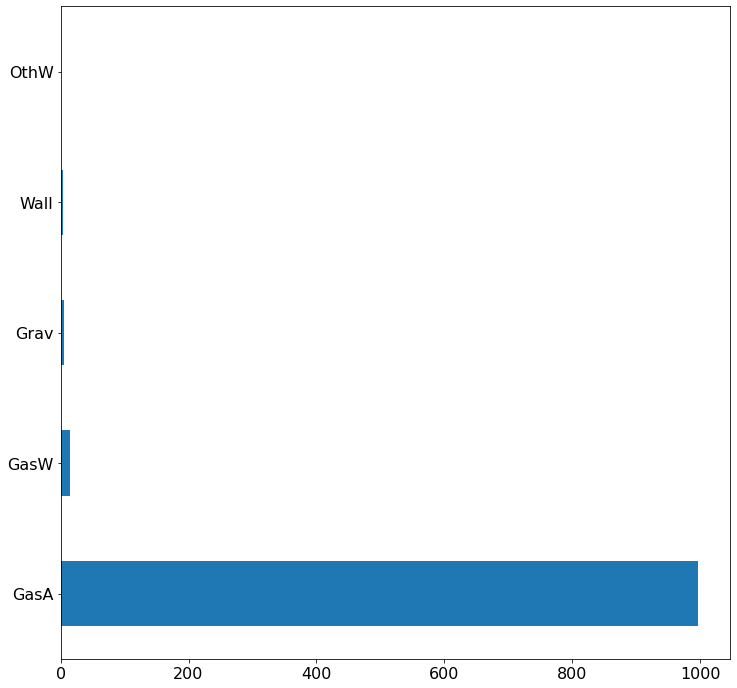

In [104]:
investigate_string(X_train['Heating'])

In [105]:
colunas_tratadas['Heating'] = 'onehot'

### HeatingQC

In [106]:
X_train['HeatingQC'].dtype

dtype('O')

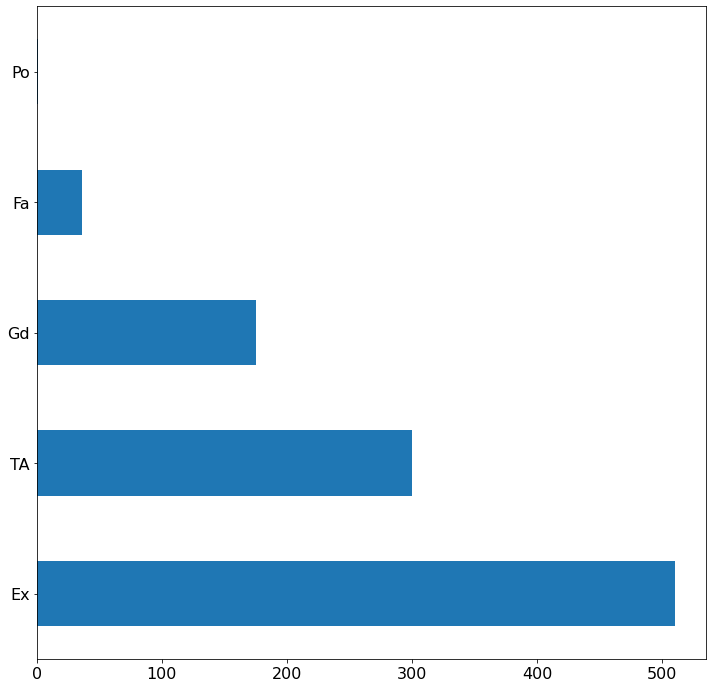

In [107]:
investigate_string(X_train['HeatingQC'])

In [108]:
colunas_tratadas['HeatingQC'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70}

### HouseStyle

In [109]:
X_train['HouseStyle'].dtype

dtype('O')

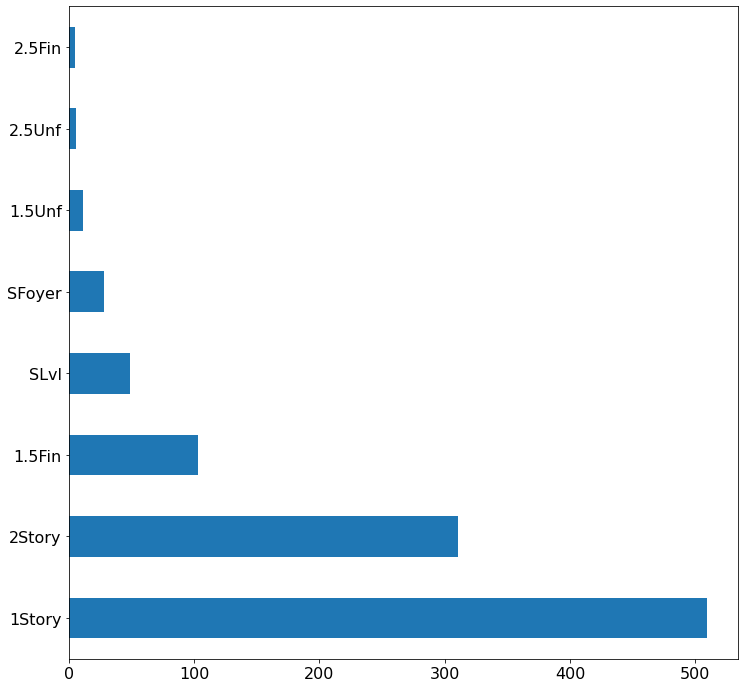

In [110]:
investigate_string(X_train['HouseStyle'])

In [111]:
colunas_tratadas['HouseStyle'] = 'onehot'

### KitchenAbvGr

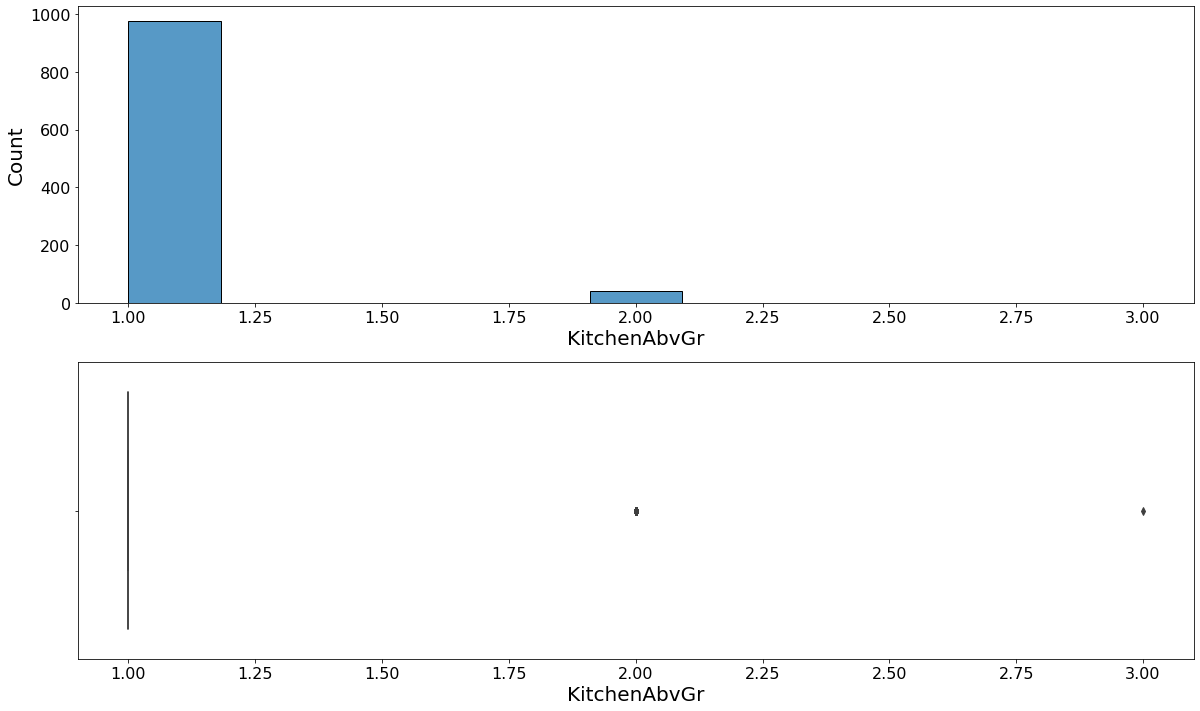

In [112]:
investigate_nmr(X_train['KitchenAbvGr'])

In [113]:
colunas_tratadas['KitchenAbvGr'] = ''

### KitchenQual

In [114]:
X_train['KitchenQual'].dtype

dtype('O')

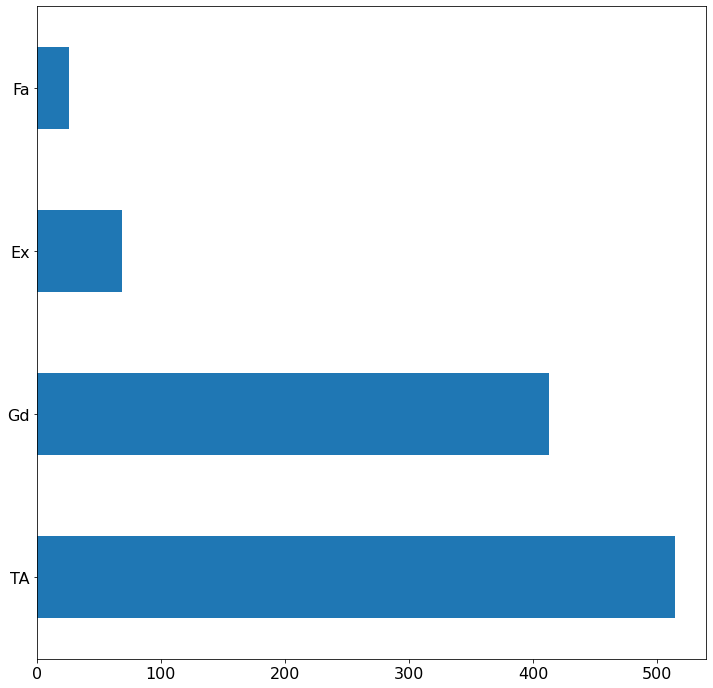

In [115]:
investigate_string(X_train['KitchenQual'])

In [116]:
colunas_tratadas['KitchenQual'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70}

### LandContour

In [117]:
X_train['LandContour'].dtype

dtype('O')

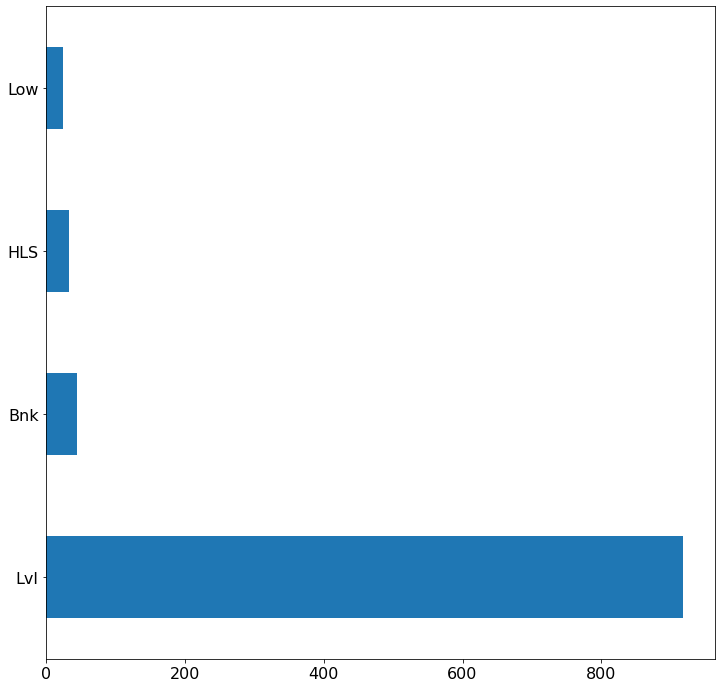

In [118]:
investigate_string(X_train['LandContour'])

In [119]:
colunas_tratadas['LandContour'] = {'Lvl':0,'Bnk':1,'HLS':2,'Low':3}

### LandSlope

In [120]:
X_train['LandSlope'].dtype

dtype('O')

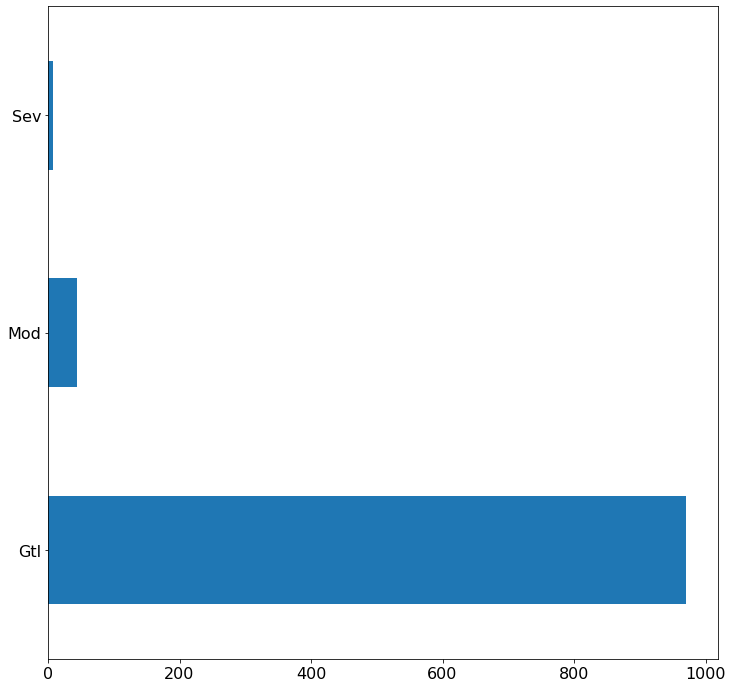

In [121]:
investigate_string(X_train['LandSlope'])

In [122]:
colunas_tratadas['LandSlope'] = {'Gtl':0,'Mod':1,'Sev':2}

### LotConfig

In [123]:
X_train['LotConfig'].dtype

dtype('O')

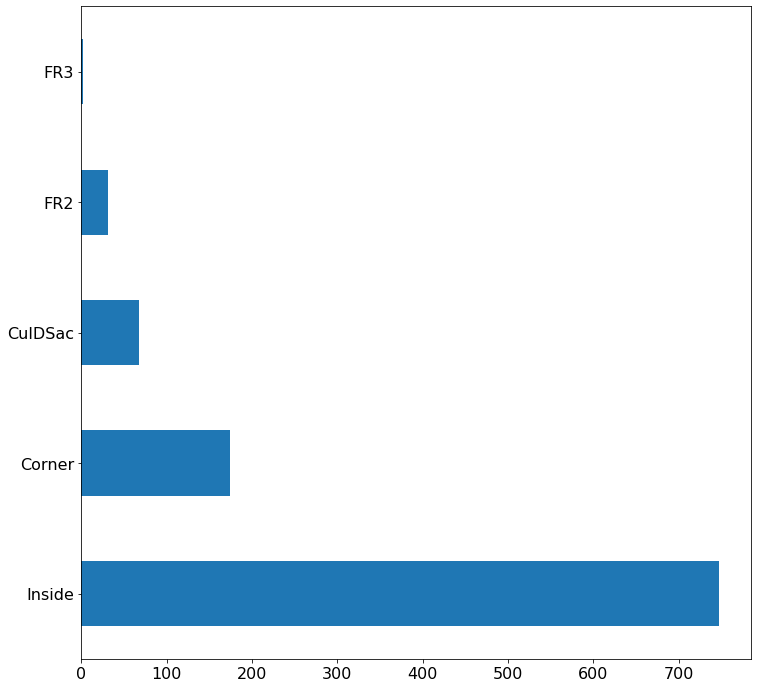

In [124]:
investigate_string(X_train['LotConfig'])

In [125]:
colunas_tratadas['LotConfig'] = 'onehot'

### LotFrontage

In [126]:
X_train['LotFrontage'].dtype

dtype('float64')

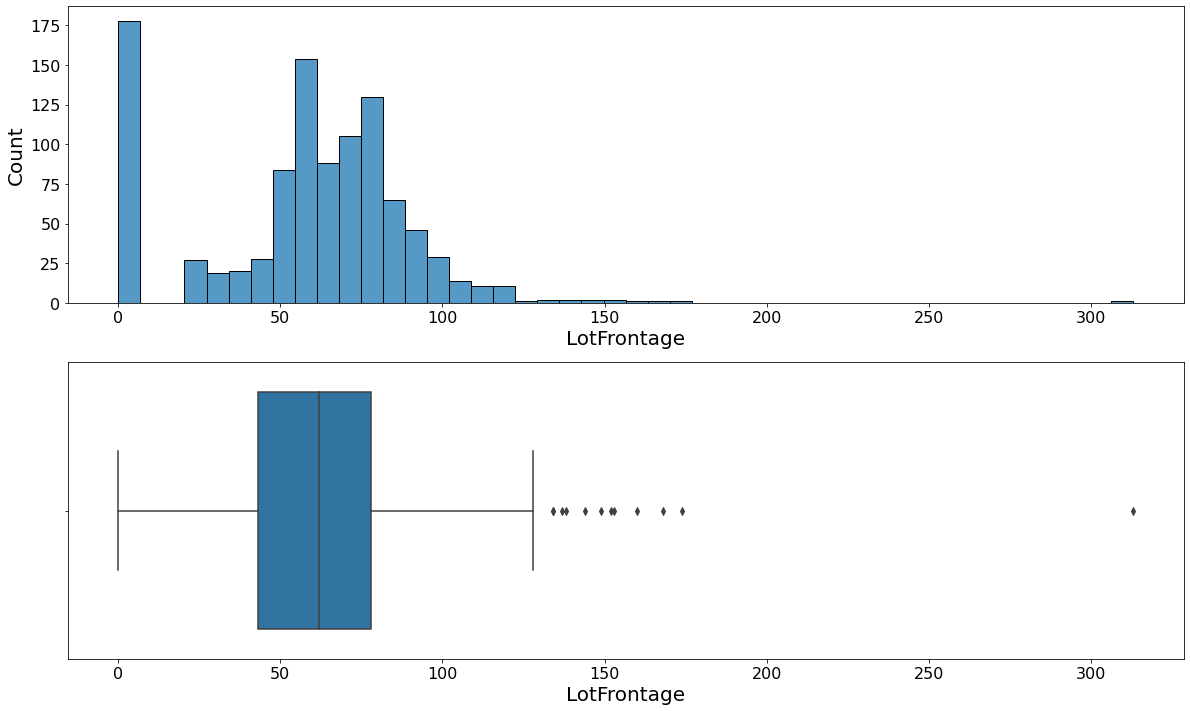

In [127]:
investigate_nmr(X_train['LotFrontage'])

In [128]:
colunas_tratadas['LotFrontage'] = ''

### LotShape

In [129]:
X_train['LotShape'].dtype

dtype('O')

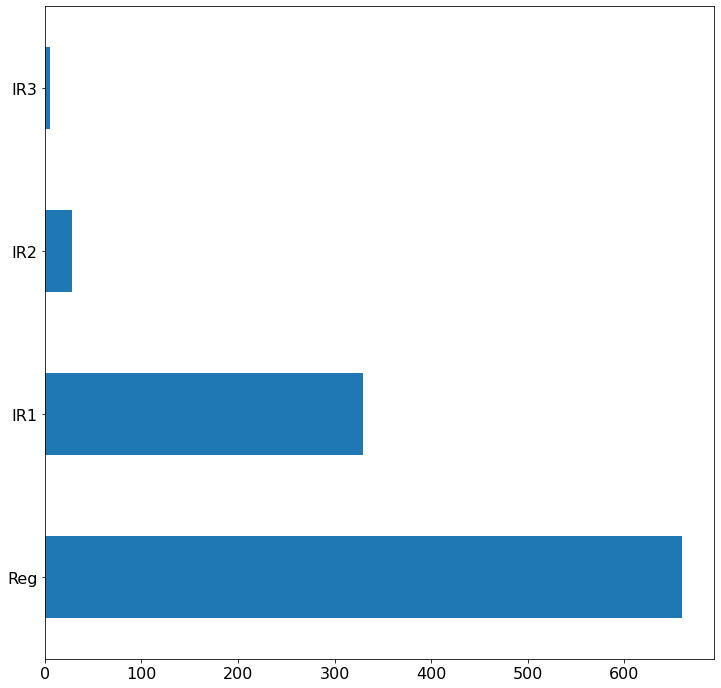

In [130]:
investigate_string(X_train['LotShape'])

In [131]:
colunas_tratadas['LotShape']={'Reg':0,'IR1':1,'IR2':2,'IR3':3}

### MSSubClass

In [132]:
X_train['MSSubClass'].dtype

dtype('int64')

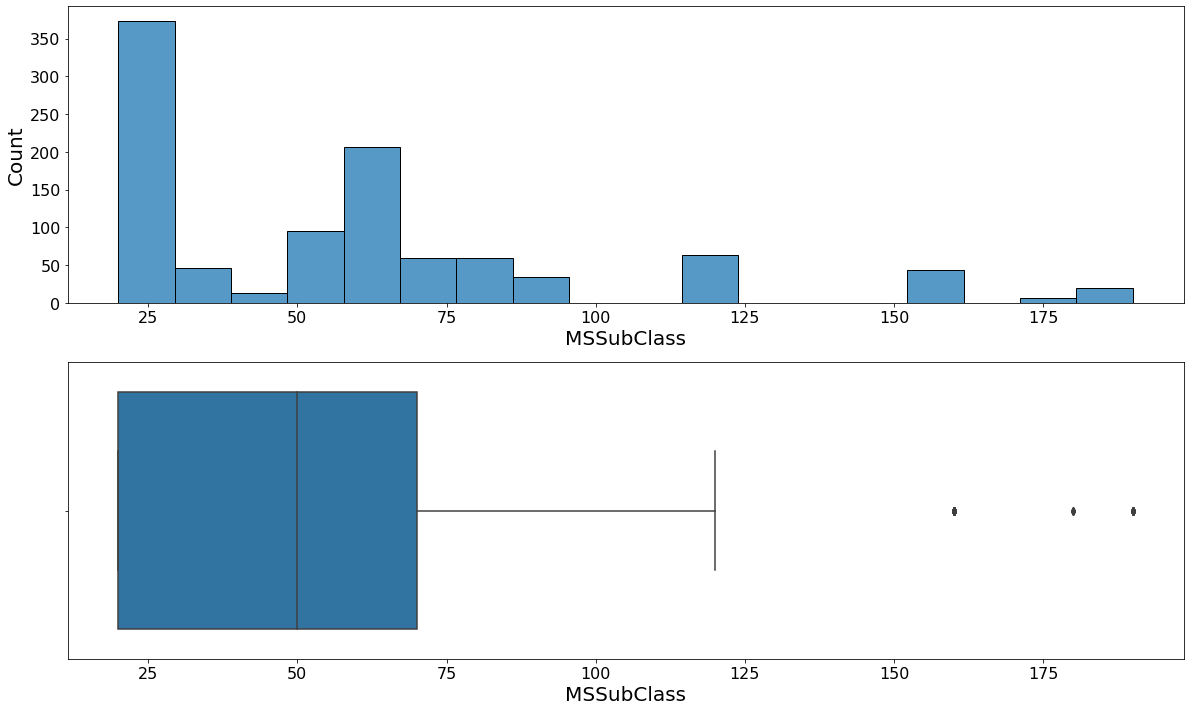

In [133]:
investigate_nmr(X_train['MSSubClass'])

In [134]:
colunas_tratadas['MSSubClass'] = ''

### MSZoning

In [135]:
X_train['MSZoning'].dtype

dtype('O')

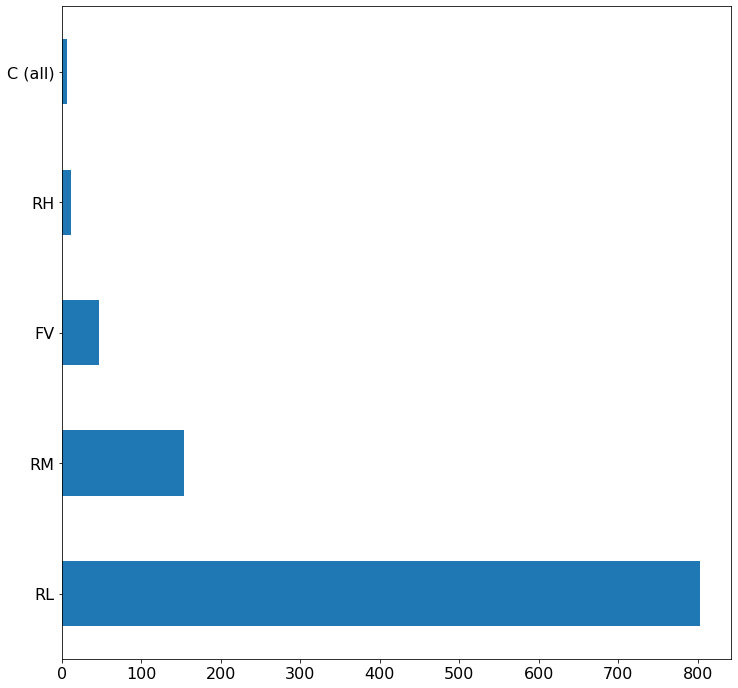

In [136]:
investigate_string(X_train['MSZoning'])

In [137]:
colunas_tratadas['MSZoning']='onehot'

### MiscFeature

In [138]:
X_train['MiscFeature'].dtype

dtype('O')

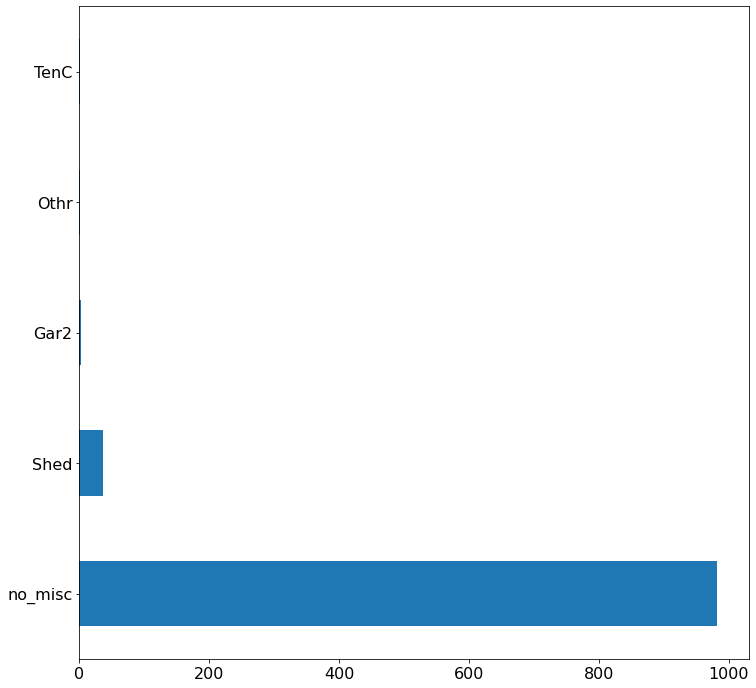

In [139]:
investigate_string(X_train['MiscFeature'])

In [140]:
colunas_tratadas['MiscFeature'] = 'onehot'

### MiscVal

In [141]:
X_train['MiscVal'].dtype

dtype('int64')

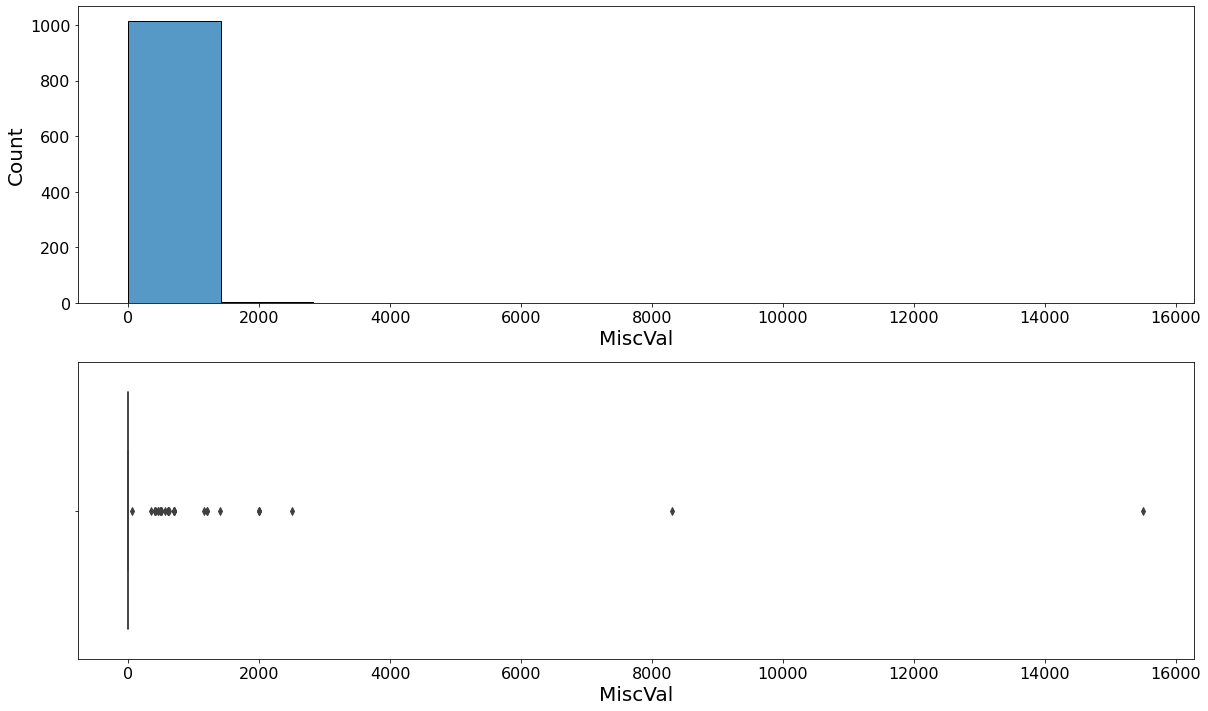

In [142]:
investigate_nmr(X_train['MiscVal'])

In [143]:
colunas_tratadas['MiscVal'] = ''

### MoSold

In [144]:
X_train['MoSold'].dtype

dtype('int64')

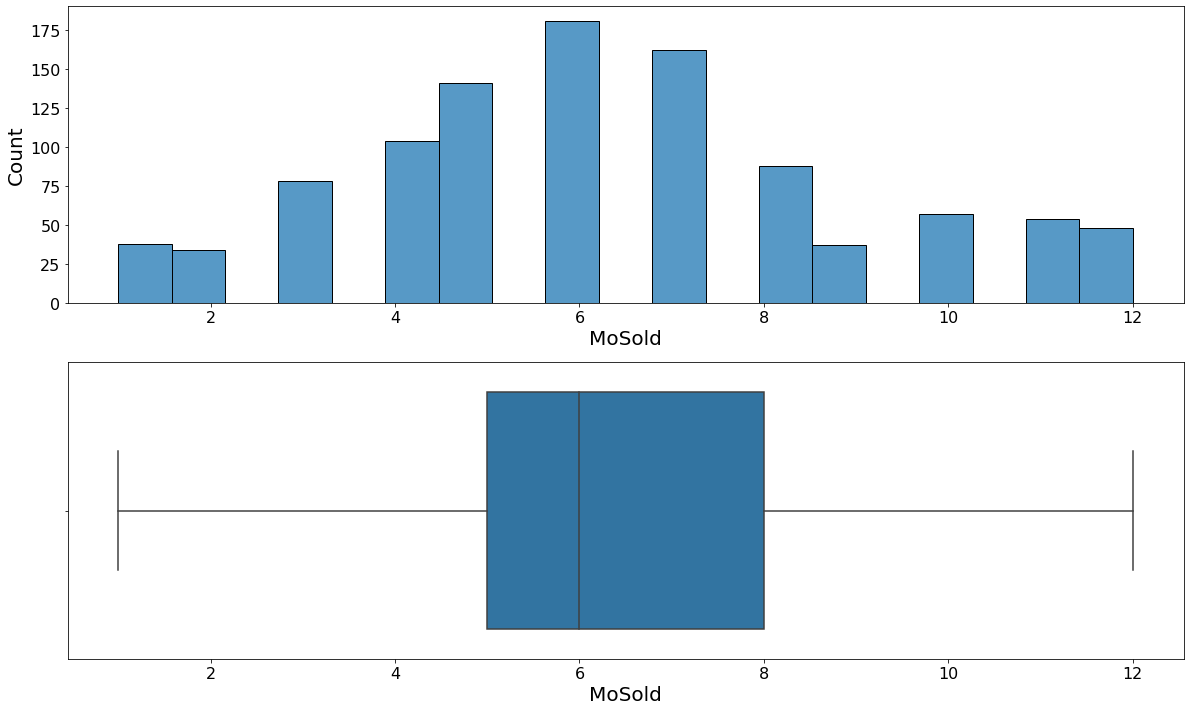

In [145]:
investigate_nmr(X_train['MoSold'])

In [146]:
colunas_tratadas['MoSold'] = ''

### Neighborhood

In [147]:
X_train['Neighborhood'].dtype

dtype('O')

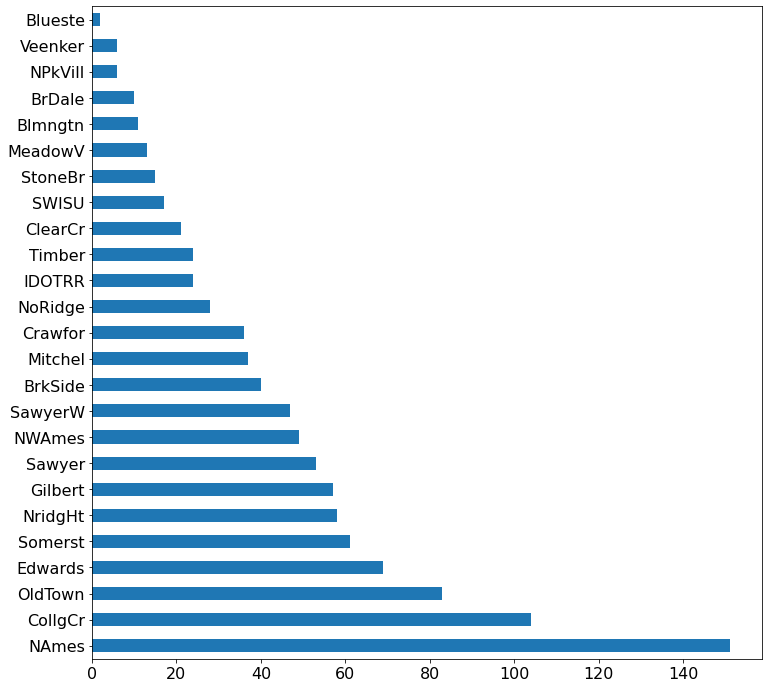

In [148]:
investigate_string(X_train['Neighborhood'])

In [149]:
colunas_tratadas['Neighborhood'] = 'onehot'

### OverallQual

In [150]:
X_train['OverallQual'].dtype

dtype('int64')

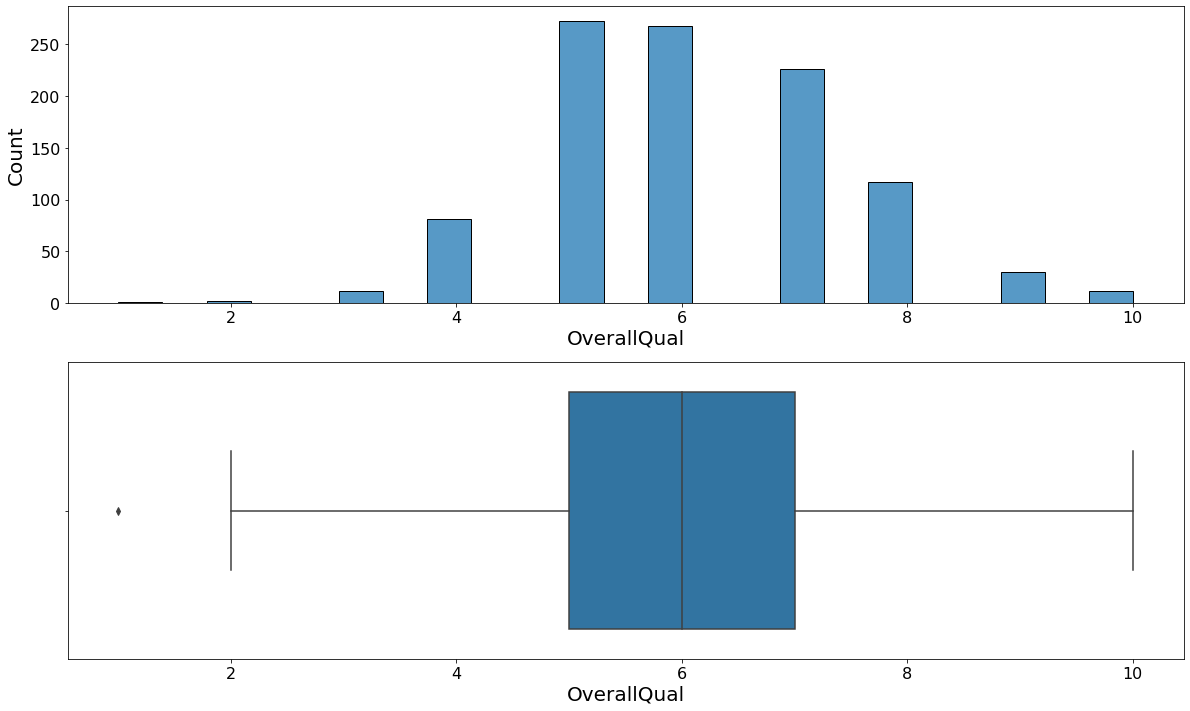

In [151]:
investigate_nmr(X_train['OverallQual'])

In [152]:
colunas_tratadas['OverallQual'] = ''

### PavedDrive

In [153]:
X_train['PavedDrive'].dtype

dtype('O')

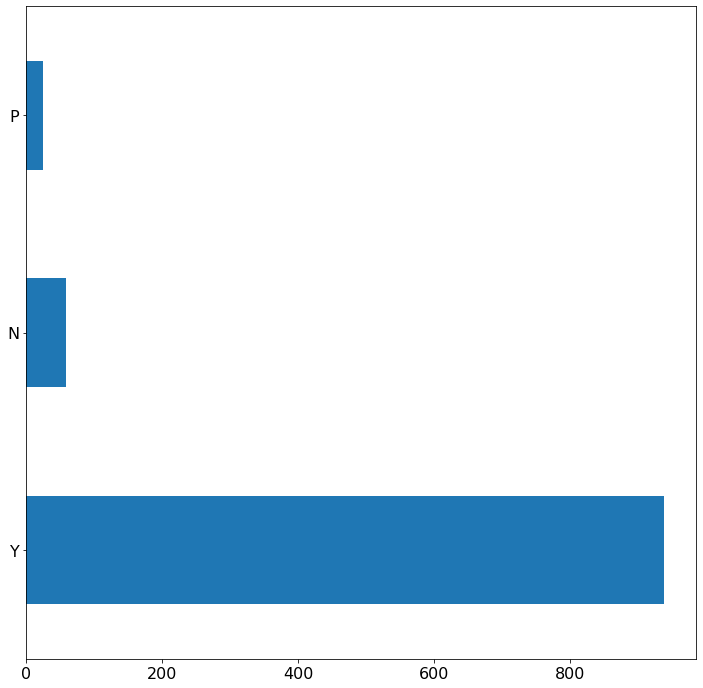

In [154]:
investigate_string(X_train['PavedDrive'])

In [155]:
colunas_tratadas['PavedDrive'] = {'Y':2,'P':1,'N':0}

### PoolQC

In [156]:
X_train['PoolQC'].dtype

dtype('O')

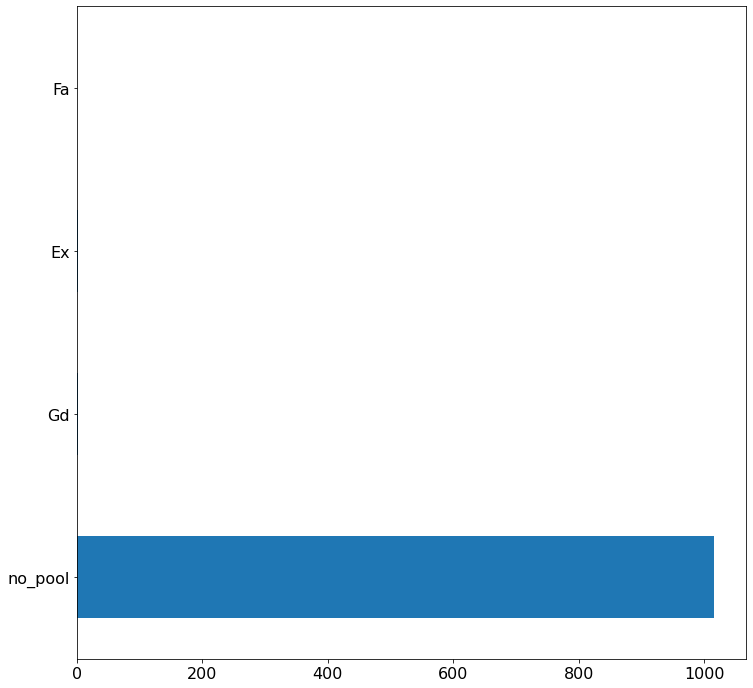

In [157]:
investigate_string(X_train['PoolQC'])

In [158]:
colunas_tratadas['PoolQC'] = {'Ex':100,'Gd':99,'TA':90,'Fa':80,'Po':70,'no_pool':0}

### RoofMatl

In [159]:
X_train['RoofMatl'].dtype

dtype('O')

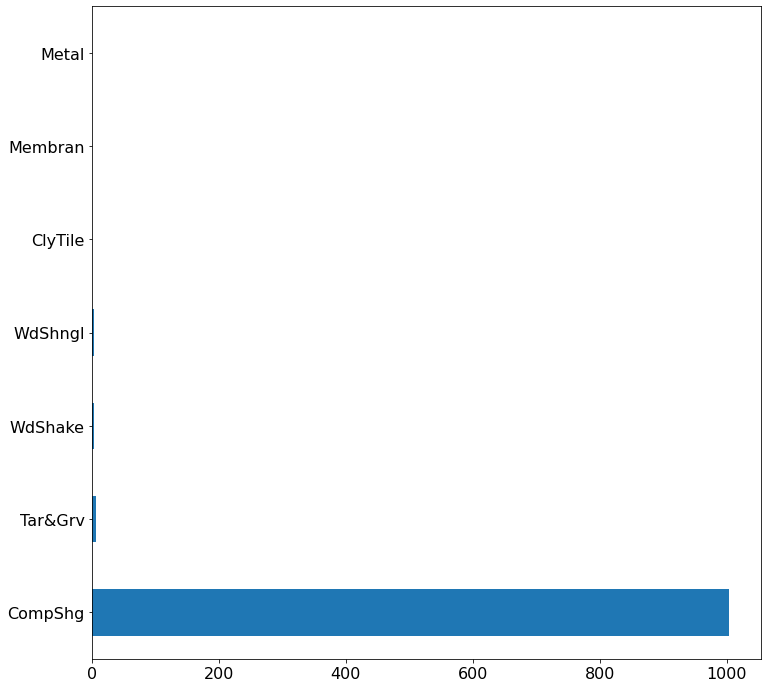

In [160]:
investigate_string(X_train['RoofMatl'])

In [161]:
colunas_tratadas['RoofMatl'] = 'onehot'

### RoofStyle

In [162]:
X_train['RoofStyle'].dtype

dtype('O')

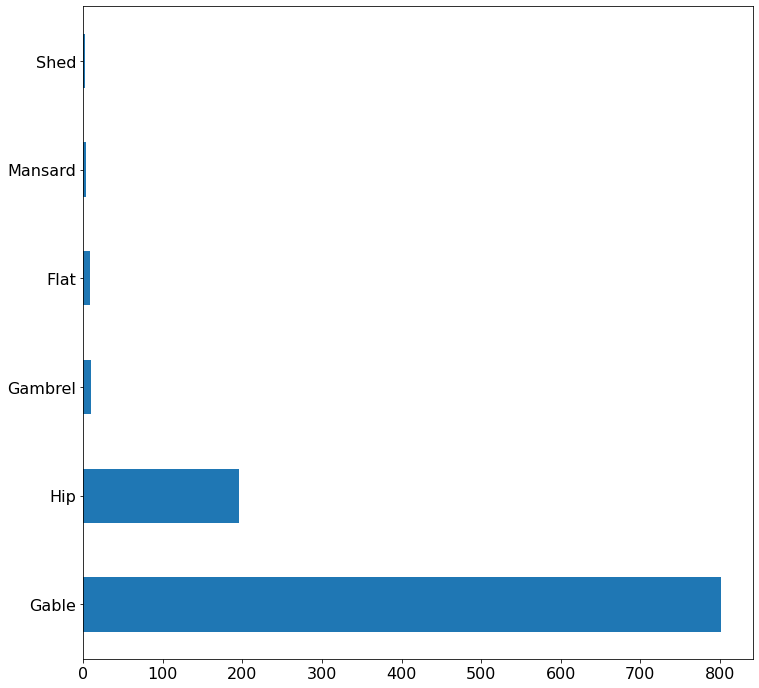

In [163]:
investigate_string(X_train['RoofStyle'])

In [164]:
colunas_tratadas['RoofStyle']='onehot'

### ScreenPorch

In [165]:
X_train['ScreenPorch'].dtype

dtype('int64')

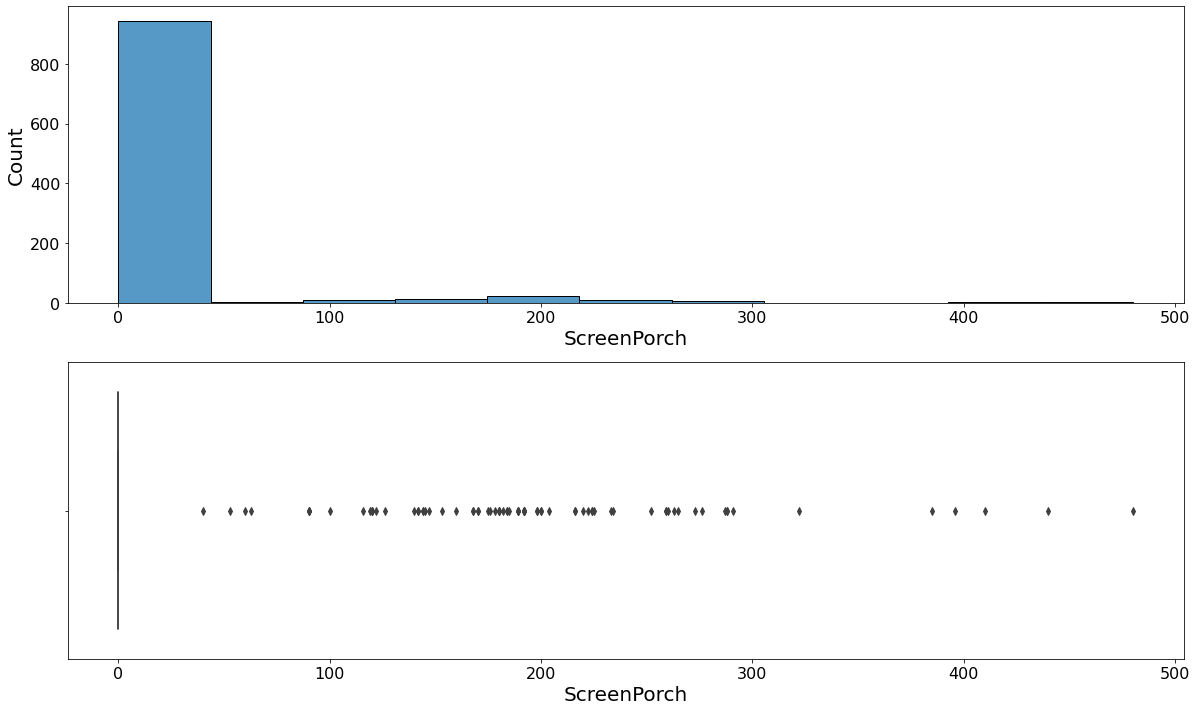

In [166]:
investigate_nmr(X_train['ScreenPorch'])

In [167]:
colunas_tratadas['ScreenPorch'] = ''

### Street

In [168]:
X_train['Street'].dtype

dtype('O')

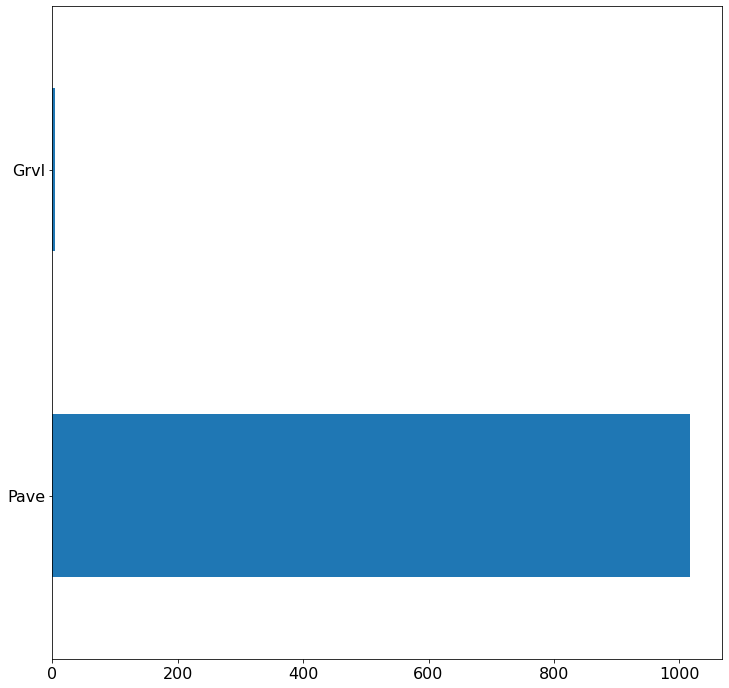

In [169]:
investigate_string(X_train['Street'])

In [170]:
colunas_tratadas['Street'] = 'onehot'

### TotRmsAbvGrd

In [171]:
X_train['TotRmsAbvGrd'].dtype

dtype('int64')

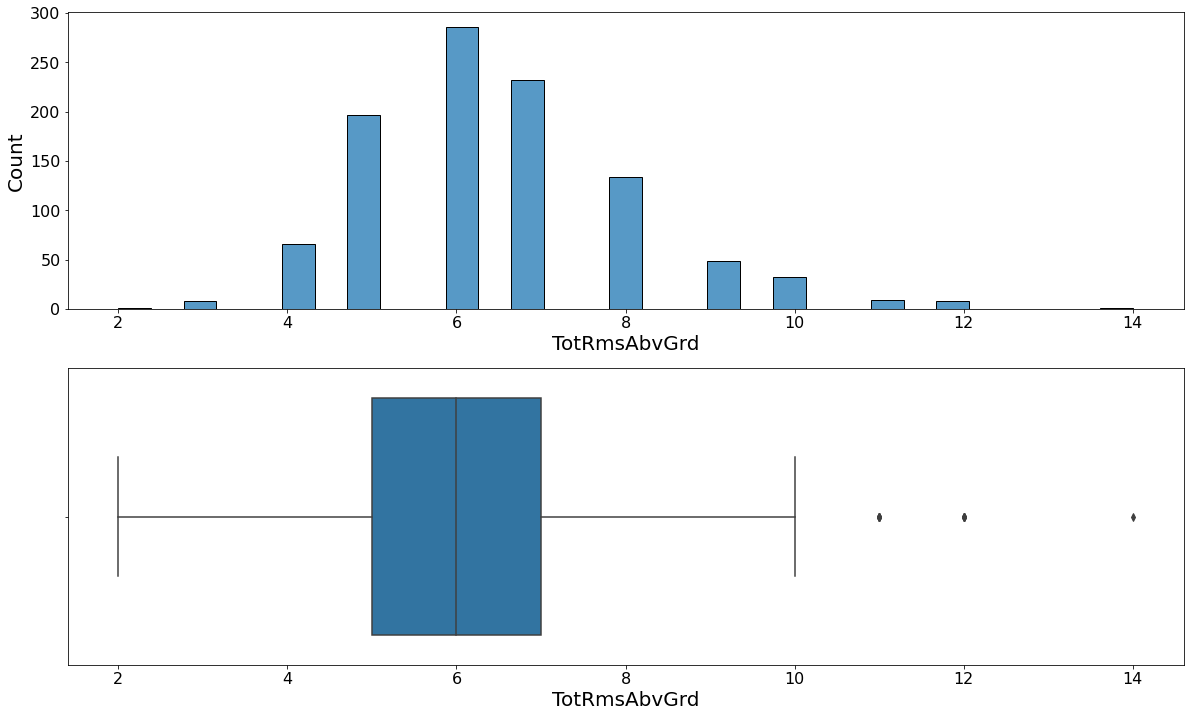

In [172]:
investigate_nmr(X_train['TotRmsAbvGrd'])

In [173]:
colunas_tratadas['TotRmsAbvGrd'] = ''

### Utilities

In [174]:
X_train['Utilities'].dtype

dtype('O')

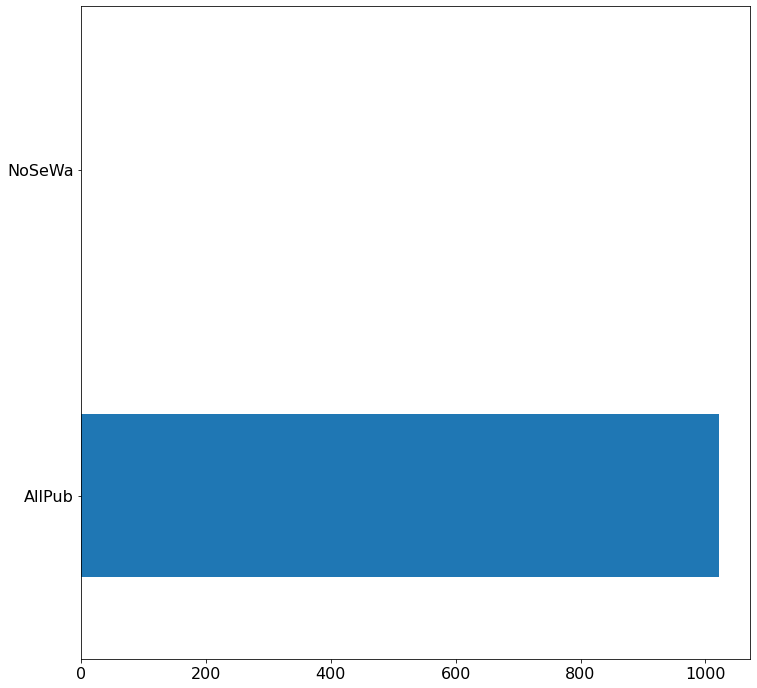

In [175]:
investigate_string(X_train['Utilities'])

In [176]:
colunas_tratadas['Utilities'] = 'onehot'

In [177]:
set(X_train.columns)-set(colunas_tratadas.keys())

set()

## TO DO

In [ ]:
class Predictor:
    def __init__(self):
        pass
    def fit(X,y):
        pass
    def transform(X:pd.DataFrame) -> pd.DataFrame:
        pass
    def predict(X):
        X_ = self.transform(X)
        pass